# AlphaFactor Research 01

# Introduction

In [1]:
import pandas as pd
import ta
import numpy as np
import pickle
import itertools
from datetime import datetime
import alphalens

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
Prices = pickle.load(open('Prices.pkl', 'rb')) #/content/drive/My Drive/Projects/trading/

In [3]:
train_start = datetime(2016, 1, 1)
train_end = datetime(2017, 12, 31)

trainPrices = {}
for symbol, data in Prices.items():
    trainPrices[symbol] = data.loc[train_start:train_end]

In [4]:
whl = trainPrices['WHL.JO'].copy()
whl.head()

high      low     open    close     volume    adj_close
Date                                                                  
2016-01-01  10015.0  10015.0  10015.0  10015.0        0.0  8272.963867
2016-01-04   9889.0   9571.0   9760.0   9605.0  1972991.0  7934.280273
2016-01-05   9912.0   9550.0   9630.0   9880.0  2359678.0  8161.446777
2016-01-06   9920.0   9645.0   9788.0   9788.0  2946740.0  8085.449219
2016-01-07   9763.0   9120.0   9600.0   9660.0  5489329.0  7979.713867

# Data cleaning and validation

In [5]:
# 2017-01-18	
trainPrices['GLPROP.JO'].loc[datetime(2017, 1, 10):datetime(2017, 1, 20)]

high     low    open     close   volume      adj_close
Date                                                                
2017-01-10  3489.0  3430.0  3475.0    3445.0  69398.0    3444.051270
2017-01-11  3465.0  3445.0  3455.0    3466.0   6426.0    3465.045410
2017-01-12  3440.0  3370.0  3440.0    3363.0  64075.0    3362.073730
2017-01-13  3400.0  3390.0  3390.0    3386.0  21058.0    3385.067383
2017-01-16  3419.0  3380.0  3395.0    3400.0   7148.0    3399.063477
2017-01-17  3385.0  3355.0  3380.0    3358.0  10926.0    3357.075195
2017-01-18  3415.0  3395.0  3395.0    3400.0   7366.0    3399.063477
2017-01-19  3405.0  3405.0  3405.0  340500.0  24398.0  340406.218750
2017-01-20  3370.0  3350.0  3370.0    3365.0   8243.0    3364.073242

In [6]:
trainPrices['GLPROP.JO'].loc[datetime(2017, 1, 19), 'close'] = 3405.00
trainPrices['GLPROP.JO'].loc[datetime(2017, 1, 19), 'adj_close'] = 3404.06218750

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [7]:
# 2017-07-12	
trainPrices['SCD.JO'].loc[datetime(2016, 1, 1):datetime(2017, 6, 30)]#['close'].plot()

high          low         open        close    volume  \
Date                                                                       
2016-01-29       0.9800       0.9800       0.9800       0.9800       0.0   
2016-02-29       0.9800       0.9800       0.9800       0.9800       0.0   
2016-03-31       1.0426       1.0426       1.0426       1.0426       0.0   
2016-04-29       1.0426       1.0426       1.0426       1.0426       0.0   
2016-05-31       1.0426       1.0426       1.0426       1.0426       0.0   
2016-06-30       1.0770       1.0770       1.0770       1.0770       0.0   
2016-07-29       1.0770       1.0770       1.0770       1.0770       0.0   
2016-08-31       1.0770       1.0770       1.0770       1.0770       0.0   
2016-09-30       1.1239       1.1239       1.1239       1.1239       0.0   
2016-10-31       1.1239       1.1239       1.1239       1.1239       0.0   
2016-11-30       1.1239       1.1239       1.1239       1.1239       0.0   
2017-01-31       1.1000       1.1000       1.1000       1.1000       0.0   
2017-02-28       1.1000       1.1000       1.1000       1.1000       0.0   
2017-03-31       1.1066       1.1066       1.1066       1.1066       0.0   
2017-04-28       1.1066       1.1066       1.1066       1.1066       0.0   
2017-05-31       1.1066       1.1066       1.1066       1.1066       0.0   
2017-06-09  183400.0000  182000.0000  183400.0000  182000.0000   55547.0   
2017-06-12  184500.0000  181600.0000  184500.0000  184500.0000    9676.0   
2017-06-13  184500.0000  182100.0000  182900.0000  183000.0000  122820.0   
2017-06-14  184500.0000  184000.0000  184000.0000  184000.0000   43226.0   
2017-06-15  184500.0000  184200.0000  184500.0000  184500.0000  183360.0   
2017-06-16  184500.0000  184500.0000  184500.0000  184500.0000       0.0   
2017-06-19  185900.0000  180100.0000  184500.0000  180100.0000  121717.0   
2017-06-20  184500.0000  183700.0000  184200.0000  183700.0000  110578.0   
2017-06-21  186000.0000  182500.0000  183700.0000  182500.0000    9868.0   
2017-06-22  187000.0000  183000.0000  183000.0000  187000.0000    3420.0   
2017-06-23  190000.0000  183600.0000  187000.0000  190000.0000   23681.0   
2017-06-26  193200.0000  190000.0000  191400.0000  190000.0000  360473.0   
2017-06-27  194000.0000  185200.0000  185300.0000  194000.0000  136528.0   
2017-06-28  197200.0000  192000.0000  192000.0000  194300.0000   11730.0   
2017-06-29  198000.0000  194300.0000  194300.0000  196000.0000   14799.0   
2017-06-30  200100.0000  196500.0000  196500.0000  200100.0000   26023.0   

                adj_close  
Date                       
2016-01-29       0.979231  
2016-02-29       0.979231  
2016-03-31       1.041782  
2016-04-29       1.041782  
2016-05-31       1.041782  
2016-06-30       1.076155  
2016-07-29       1.076155  
2016-08-31       1.076155  
2016-09-30       1.123018  
2016-10-31       1.123018  
2016-11-30       1.123018  
2017-01-31       1.099137  
2017-02-28       1.099137  
2017-03-31       1.105732  
2017-04-28       1.105732  
2017-05-31       1.105732  
2017-06-09  181857.218750  
2017-06-12  184355.250000  
2017-06-13  182856.437500  
2017-06-14  183855.640625  
2017-06-15  184355.250000  
2017-06-16  184355.250000  
2017-06-19  179958.718750  
2017-06-20  183555.890625  
2017-06-21  182357.875000  
2017-06-22  186854.375000  
2017-06-23  189852.015625  
2017-06-26  189852.015625  
2017-06-27  193848.890625  
2017-06-28  194148.703125  
2017-06-29  195847.359375  
2017-06-30  199944.171875

In [8]:
scd = trainPrices['SCD.JO']
trainPrices['SCD.JO'] = scd.loc[datetime(2017, 6, 1):]
trainPrices['SCD.JO'].head()

high       low      open     close    volume      adj_close
Date                                                                       
2017-06-09  183400.0  182000.0  183400.0  182000.0   55547.0  181857.218750
2017-06-12  184500.0  181600.0  184500.0  184500.0    9676.0  184355.250000
2017-06-13  184500.0  182100.0  182900.0  183000.0  122820.0  182856.437500
2017-06-14  184500.0  184000.0  184000.0  184000.0   43226.0  183855.640625
2017-06-15  184500.0  184200.0  184500.0  184500.0  183360.0  184355.250000

# Classical techniques and cross-sectional strategies

## Basic trend following and/or Counter-trend strategy

In [9]:
ema26 = ta.trend.ema(whl['close'], periods = 26)
ema12 =ta.trend.ema(whl['close'], periods = 12)

whl['ema26'] = ema26
whl['ema12'] = ema12

whl['macd'] = ema12 - ema26
whl['macd_signal_line'] = ta.trend.ema(whl['macd'], periods = 9)

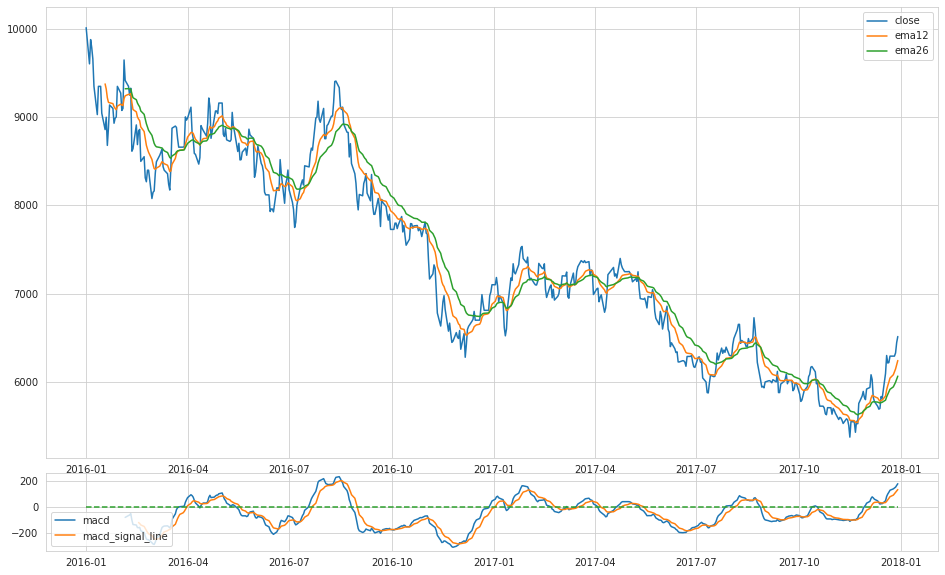

In [10]:
fig = plt.figure(figsize = (16, 10))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(whl.index, whl['close'])
ax1.plot(whl.index, whl['ema12'])
ax1.plot(whl.index, whl['ema26'])
ax1.legend(('close', 'ema12', 'ema26', ))
ax1.set_xticklabels(' ')

ax2.plot(whl.index, whl['macd'])
ax2.plot(whl.index, whl['macd_signal_line'])
ax2.plot(whl.index, list(itertools.repeat(0, len(whl.index))), linestyle = 'dashed')
ax2.legend(('macd', 'macd_signal_line', ), loc = 'lower left')

In [11]:
%time
macd_data = pd.DataFrame()
for i, (symbol, data) in enumerate(trainPrices.items()):
    if len(data) > 100:
        data = data.copy()
        norm_close = data['close']
        
        ema26 = ta.trend.ema(norm_close, periods = 26)
        ema12 = ta.trend.ema(norm_close, periods = 12)
        macd = ema12.sub(ema26)
        macd_ema9 = ta.trend.ema(macd, periods = 9)
        macd_signal = macd_ema9.sub(macd)

        macd_signal.name = 'macd_signal'
        out = pd.DataFrame(macd_signal)
        out['symbol'] = symbol
        out = out.reset_index().set_index(['Date', 'symbol'])

        macd_data = pd.concat([macd_data, out])
        # print(i, symbol)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


In [12]:
macd_data.tail()

macd_signal
Date       symbol              
2017-12-25 ZPLP.JO   -53.718039
2017-12-26 ZPLP.JO   -47.688752
2017-12-27 ZPLP.JO   -40.354182
2017-12-28 ZPLP.JO   -32.111094
2017-12-29 ZPLP.JO   -23.848948

In [13]:
prices_data = pd.DataFrame()
for symbol, data in trainPrices.items():
    out = data['close']
    out.name = symbol
    prices_data = pd.concat([prices_data, out], axis = 1)

In [14]:
prices_data.index = pd.to_datetime(prices_data.index)

In [15]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = macd_data,
    prices = prices_data,
    quantiles = 3,
    periods = [1, 2, 5]
)
factor_data

Dropped 7.7% entries from factor data: 7.7% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D      factor  factor_quantile
date       asset                                                             
2016-02-17 ABG.JO   0.042994  0.002849 -0.032792 -125.100744                1
2016-02-18 ABG.JO  -0.038491 -0.024390 -0.060849 -152.404576                1
2016-02-19 ABG.JO   0.014665 -0.025235 -0.043269 -119.925054                1
2016-02-22 ABG.JO  -0.039323 -0.049479 -0.114583 -104.244807                1
2016-02-23 ABG.JO  -0.010572  0.002033 -0.058756  -46.965019                1
...                      ...       ...       ...         ...              ...
2017-12-18 ZPLP.JO -0.000160  0.028000  0.023200  -21.912416                1
2017-12-19 ZPLP.JO  0.028165  0.024164  0.023364  -34.654790                1
2017-12-20 ZPLP.JO -0.003891 -0.004669 -0.004981  -51.740460                1
2017-12-21 ZPLP.JO -0.000781 -0.000781 -0.002344  -57.707486                1
2017-12-22 ZPLP.JO  0.000000  0.000000 -0.002346  -57.537588                1

[157291 rows x 5 columns]

In [16]:
%time
volume_data = pd.DataFrame()
for i, (symbol, data) in enumerate(trainPrices.items()):
    if len(data) > 100:
        data = data.copy()
        volume = data['volume']
        
        vol_sma20 = ta.trend.sma(volume, periods = 5)

        vol_sma20.name = 'volume_oscillator20'
        out = pd.DataFrame(vol_sma20)
        out['symbol'] = symbol
        out = out.reset_index().set_index(['Date', 'symbol'])

        volume_data = pd.concat([volume_data, out])
        # print(i, symbol)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


In [17]:
volume_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = volume_data,
    prices = prices_data,
    quantiles = 3,
    periods = [1]
)
volume_factor_data

Dropped 1.0% entries from factor data: 1.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D     factor  factor_quantile
date       asset                                        
2016-01-07 ABG.JO   0.015385  1129916.0                3
2016-01-08 ABG.JO  -0.041667  1391682.6                3
2016-01-11 ABG.JO   0.011858  1359832.2                3
2016-01-12 ABG.JO   0.030000  1487951.2                3
2016-01-13 ABG.JO  -0.012060  1798498.2                3
...                      ...        ...              ...
2017-12-22 ZPLP.JO  0.000000    50607.8                2
2017-12-25 ZPLP.JO  0.000000    41872.2                2
2017-12-26 ZPLP.JO -0.000313       68.8                1
2017-12-27 ZPLP.JO -0.001251     2006.6                1
2017-12-28 ZPLP.JO -0.000783     1983.0                1

[168706 rows x 3 columns]

In [18]:
volume_quantiles = volume_factor_data['factor_quantile']
volume_quantiles.name = 'group'

In [19]:
factor_data = pd.concat([factor_data, volume_quantiles], axis = 1).dropna()
factor_data

1D        2D        5D      factor  \
date       asset                                                 
2016-02-17 ABG.JO     0.042994  0.002849 -0.032792 -125.100744   
           ABSP.JO   -0.000872 -0.003791 -0.006572  219.543781   
           ACE.JO     0.000000 -0.066667  0.000000   -0.227640   
           ACG.JO     0.001365 -0.000683  0.002730   -5.161644   
           ACL.JO    -0.039726 -0.004110 -0.013699    0.740830   
...                        ...       ...       ...         ...   
2017-12-22 WSL.JO     0.000000  0.000000  0.012121    0.353278   
           YRK.JO     0.000000  0.000000 -0.044444   -1.657683   
           YYLBEE.JO  0.000000  0.000000  0.000728  -13.264181   
           ZED.JO     0.000000  0.000000  0.028316   -5.564819   
           ZPLP.JO    0.000000  0.000000 -0.002346  -57.537588   

                      factor_quantile  group  
date       asset                              
2016-02-17 ABG.JO                 1.0      3  
           ABSP.JO                3.0      1  
           ACE.JO                 2.0      1  
           ACG.JO                 2.0      2  
           ACL.JO                 3.0      3  
...                               ...    ...  
2017-12-22 WSL.JO                 3.0      2  
           YRK.JO                 2.0      1  
           YYLBEE.JO              1.0      1  
           ZED.JO                 2.0      3  
           ZPLP.JO                1.0      2  

[157291 rows x 6 columns]

Returns Analysis


1D      2D      5D
Ann. alpha                                      0.106   0.259   0.093
beta                                            0.596  -0.046   0.296
Mean Period Wise Return Top Quantile (bps)     17.006  12.820   7.508
Mean Period Wise Return Bottom Quantile (bps) -19.034 -15.133  -9.058
Mean Period Wise Spread (bps)                  36.040  27.956  16.593

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/tears.py:258: UserWarning: 'freq' not set in factor_data index: assuming business day
  UserWarning


<Figure size 432x288 with 0 Axes>

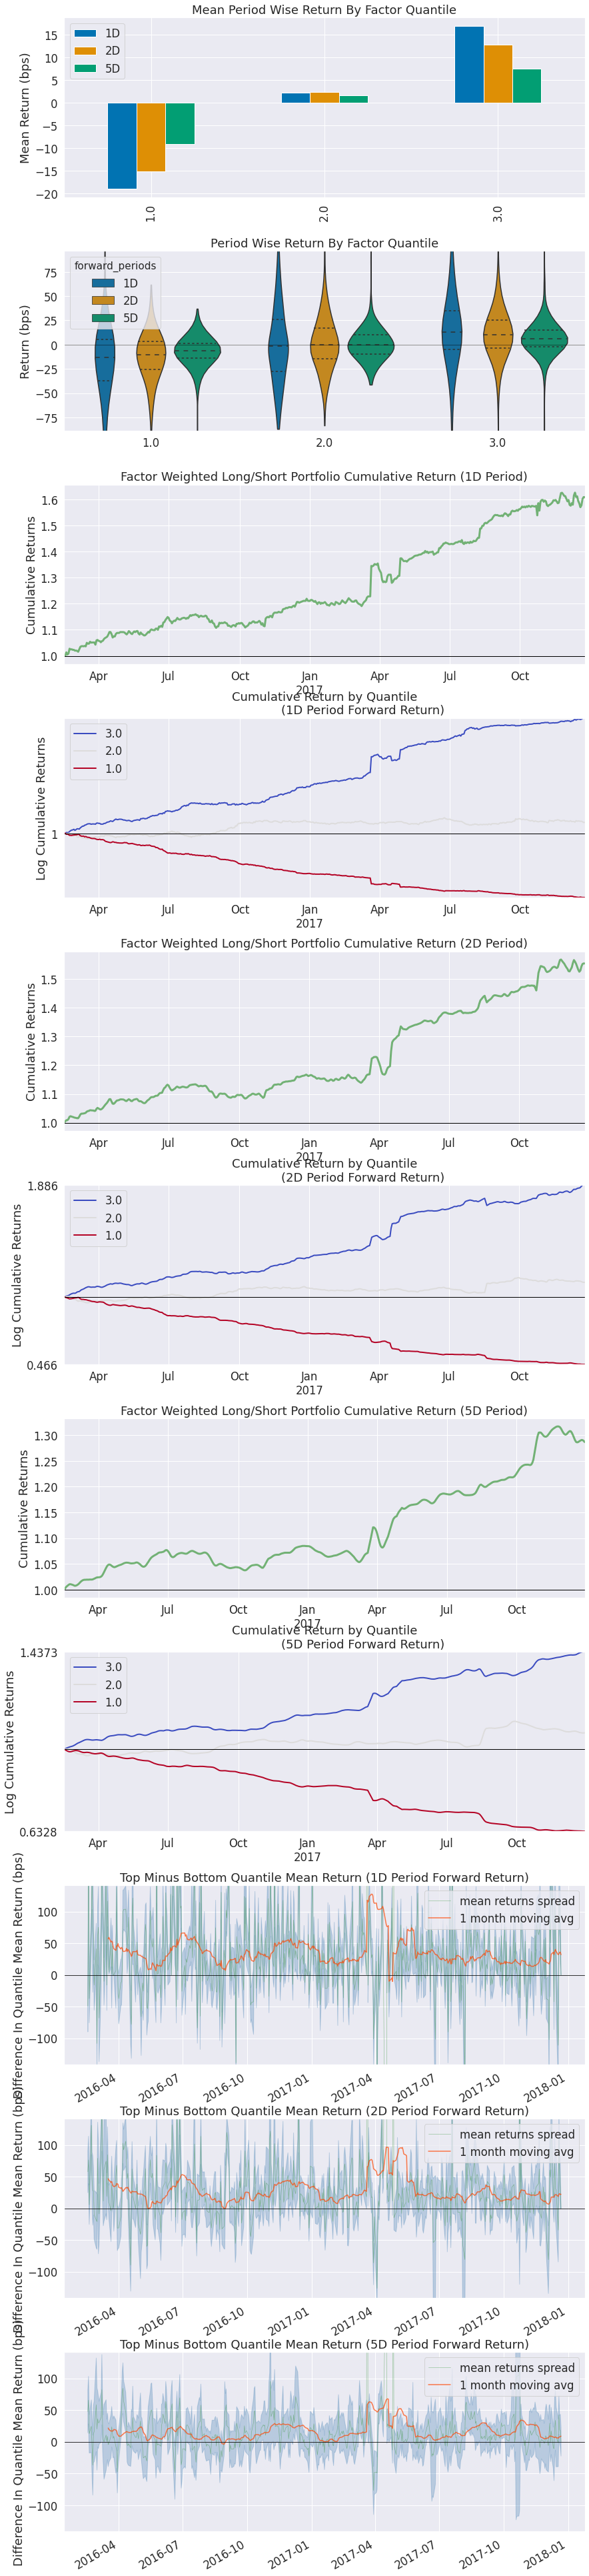

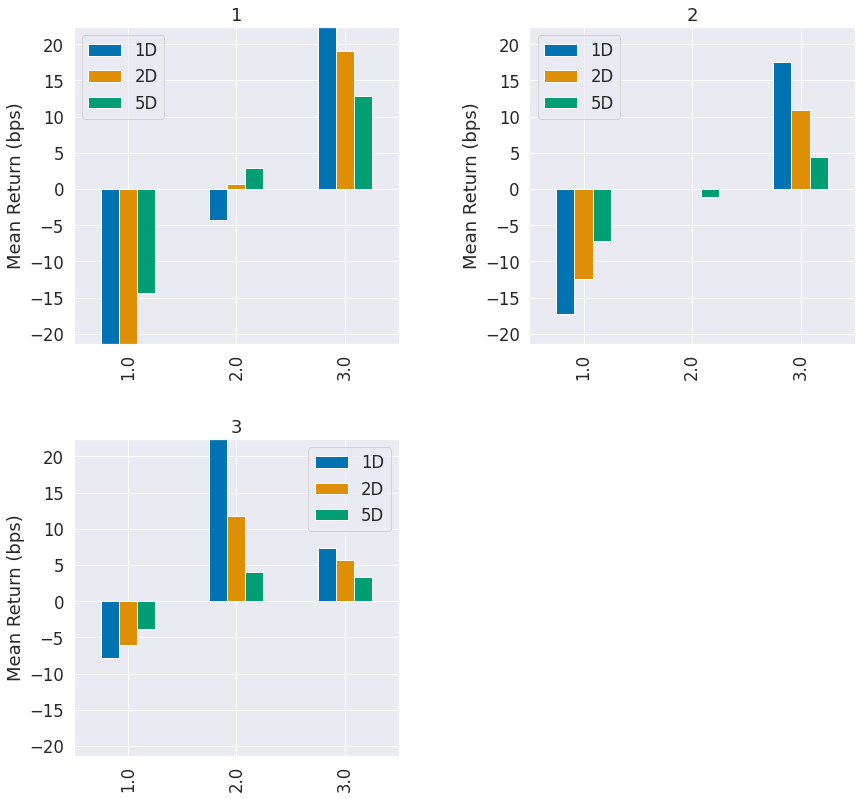

In [20]:
alphalens.tears.create_returns_tear_sheet(factor_data, by_group = True)

In [336]:
weights = alphalens.performance.factor_positions(
    factor_data, period = '1D', quantiles = [1, 3])
weights = pd.DataFrame(weights).reset_index().set_index('date').rename(columns = {'factor':'weight'})
weights

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:541: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


asset         ABG.JO   ABSP.JO  ACE.JO    ACG.JO    ACL.JO    ACS.JO  \
date                                                                   
2016-02-17 -0.011741  0.027993     0.0  0.000000  0.002768  0.000000   
2016-02-18 -0.013634  0.018981     0.0  0.000000  0.002991  0.000000   
2016-02-19 -0.011784  0.016375     0.0  0.001529  0.002736  0.000000   
2016-02-22 -0.009977  0.008453     0.0  0.001175  0.002209  0.000000   
2016-02-23 -0.004630  0.008153     0.0  0.000420  0.001672  0.000000   
...              ...       ...     ...       ...       ...       ...   
2017-12-19 -0.015575 -0.005141     0.0  0.000000 -0.000139 -0.001185   
2017-12-20 -0.016620 -0.007790     0.0  0.000000  0.000188 -0.000870   
2017-12-21 -0.014676 -0.010012     0.0  0.000000  0.000646 -0.000436   
2017-12-22 -0.011556 -0.011727     0.0  0.000000  0.001155  0.000044   
2017-12-25  0.000000  0.000000     0.0  0.000000  0.000000  0.000000   

asset         ACT.JO    ADH.JO    ADI.JO    ADR.JO  ...    VKE.JO    VLE.JO  \
date                                                ...                       
2016-02-17  0.000000  0.000000  0.000000  0.004277  ...  0.001244  0.000000   
2016-02-18  0.000000  0.002576  0.000000  0.004476  ...  0.001236  0.000000   
2016-02-19  0.000000  0.000000  0.002414  0.004547  ...  0.000589  0.000000   
2016-02-22  0.000000  0.001763  0.002080  0.004097  ...  0.000308  0.000000   
2016-02-23  0.000000  0.001171  0.001434  0.003758  ... -0.000610  0.001251   
...              ...       ...       ...       ...  ...       ...       ...   
2017-12-19  0.000000 -0.001559 -0.001097  0.000204  ... -0.001034 -0.000883   
2017-12-20  0.000000 -0.001421 -0.000691  0.000500  ... -0.000589  0.000000   
2017-12-21  0.000000 -0.001252 -0.000154  0.000943  ... -0.000255  0.000000   
2017-12-22  0.000892 -0.000953  0.000000  0.001060  ...  0.000175  0.000000   
2017-12-25  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   

asset         VOD.JO  WEA.JO    WHL.JO    WSL.JO  YRK.JO  YYLBEE.JO    ZED.JO  \
date                                                                            
2016-02-17 -0.002147     0.0  0.007214  0.000000     0.0   0.000000  0.001170   
2016-02-18 -0.002783     0.0  0.005672  0.000000     0.0   0.000000  0.001064   
2016-02-19 -0.001696     0.0  0.007228  0.000000     0.0   0.000000  0.000621   
2016-02-22 -0.000643     0.0  0.006845  0.000000     0.0   0.000000  0.000363   
2016-02-23 -0.000563     0.0  0.008159  0.000000     0.0   0.000000 -0.000204   
...              ...     ...       ...       ...     ...        ...       ...   
2017-12-19 -0.005944     0.0 -0.003125  0.000000     0.0  -0.000573  0.000000   
2017-12-20 -0.005330     0.0 -0.003091 -0.000224     0.0  -0.001381  0.000000   
2017-12-21 -0.006197     0.0 -0.002987  0.000340     0.0  -0.000766  0.000000   
2017-12-22 -0.004091     0.0 -0.003077  0.000886     0.0  -0.000201  0.000000   
2017-12-25  0.000000     0.0  0.000000  0.000000     0.0   0.000000  0.000000   

asset        ZPLP.JO  
date                  
2016-02-17  0.001193  
2016-02-18  0.001406  
2016-02-19  0.001192  
2016-02-22  0.000000  
2016-02-23  0.001284  
...              ...  
2017-12-19 -0.002956  
2017-12-20 -0.003556  
2017-12-21 -0.003785  
2017-12-22 -0.003738  
2017-12-25  0.000000  

[484 rows x 346 columns]

In [337]:
weights = pd.melt(weights.reset_index(), id_vars = ['date'], value_name = 'weight').set_index('date')
weights

asset    weight
date                         
2016-02-17   ABG.JO -0.011741
2016-02-18   ABG.JO -0.013634
2016-02-19   ABG.JO -0.011784
2016-02-22   ABG.JO -0.009977
2016-02-23   ABG.JO -0.004630
...             ...       ...
2017-12-19  ZPLP.JO -0.002956
2017-12-20  ZPLP.JO -0.003556
2017-12-21  ZPLP.JO -0.003785
2017-12-22  ZPLP.JO -0.003738
2017-12-25  ZPLP.JO  0.000000

[167464 rows x 2 columns]

In [352]:
daily_rets = factor_data[['1D', 'factor_quantile']] 
daily_weights = weights.reset_index().set_index(['date', 'asset'])
data = pd.concat([daily_rets, daily_weights], axis = 1).reset_index().set_index('date').dropna()
data

asset        1D  factor_quantile    weight
date                                                      
2016-02-17     ABG.JO  0.042994              1.0 -0.011741
2016-02-17    ABSP.JO -0.000872              3.0  0.027993
2016-02-17     ACE.JO  0.000000              2.0  0.000000
2016-02-17     ACG.JO  0.001365              2.0  0.000000
2016-02-17     ACL.JO -0.039726              3.0  0.002768
...               ...       ...              ...       ...
2017-12-22     WSL.JO  0.000000              3.0  0.000886
2017-12-22     YRK.JO  0.000000              2.0  0.000000
2017-12-22  YYLBEE.JO  0.000000              1.0 -0.000201
2017-12-22     ZED.JO  0.000000              2.0  0.000000
2017-12-22    ZPLP.JO  0.000000              1.0 -0.003738

[157291 rows x 4 columns]

In [342]:
adh_weights = data[data['asset'] == 'WHL.JO']
adh_weights

asset        1D  factor_quantile    weight
date                                                   
2016-02-17  WHL.JO  0.001922              3.0  0.007214
2016-02-18  WHL.JO -0.040849              3.0  0.005672
2016-02-19  WHL.JO  0.006235              3.0  0.007228
2016-02-22  WHL.JO -0.027943              3.0  0.006845
2016-02-23  WHL.JO -0.005413              3.0  0.008159
...            ...       ...              ...       ...
2017-12-18  WHL.JO  0.033465              1.0 -0.002648
2017-12-19  WHL.JO -0.013492              1.0 -0.003125
2017-12-20  WHL.JO  0.000805              1.0 -0.003091
2017-12-21  WHL.JO  0.011736              1.0 -0.002987
2017-12-22  WHL.JO  0.000000              1.0 -0.003077

[479 rows x 4 columns]

Text(0, 0.5, 'Daily returns')

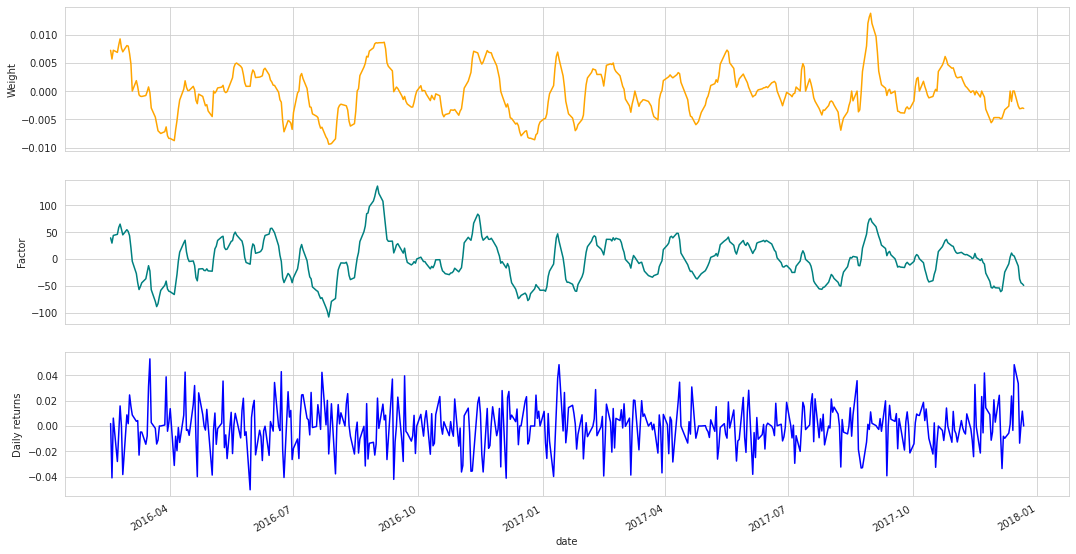

In [351]:
fig, axes = plt.subplots(3, 1, figsize = (18, 10), sharex = True)

g = adh_weights['weight'].plot(color = 'orange', ax = axes[0])
g.set_ylabel('Weight')

df = factor_data.reset_index().set_index('date')
df = df[df['asset'] == 'WHL.JO']
g = df['factor'].plot(color = 'teal', ax = axes[1])
g.set_ylabel('Factor')
g = df['1D'].plot(color = 'blue', ax = axes[2])
g.set_ylabel('Daily returns')

In [347]:
portfolio_initial_value = 1

In [348]:
def getCumulativeReturns(returns):
    cumulative_returns = returns.cumsum()
    return cumulative_returns

In [353]:
data['portfolio_returns'] = data['1D'].mul(data['weight'])

In [354]:
factor_quantiles_cumulative_returns = pd.DataFrame()
for asset in data['asset'].unique():
    filtered_data = data[data['asset'] == asset].copy()
    portfolio_returns = getCumulativeReturns(
        returns = filtered_data['portfolio_returns'])
    filtered_data['portfolio_returns'] = portfolio_returns
    factor_quantiles_cumulative_returns = pd.concat([
        factor_quantiles_cumulative_returns, filtered_data
    ])

In [355]:
data = factor_quantiles_cumulative_returns.reset_index()
long_short = data[data['factor_quantile'].isin([1, 3])].groupby(['date']).sum().add(portfolio_initial_value)
filt_data_short = data[data['factor_quantile'] == 1].groupby(['date']).sum().mul(-1).add(portfolio_initial_value)
filt_data_middle = data[data['factor_quantile'] == 2].groupby(['date']).sum().add(portfolio_initial_value)
filt_data_long = data[data['factor_quantile'] == 3].groupby(['date']).sum().add(portfolio_initial_value)

In [ ]:
fig, axes = plt.subplots(2, 1, figsize = (18, 12), sharex = True)
g = long_short['portfolio_returns'].plot(ax = axes[0])
g.legend(('Long-Short', ))
g.set_title('Factor Weighted Long-Short Portfolio')
g.set_ylabel('Cumulative Returns \n')

g = filt_data_long['portfolio_returns'].plot(ax = axes[1], color = 'teal')
g = filt_data_short['portfolio_returns'].plot(ax = axes[1], color = 'green')
g = filt_data_middle['portfolio_returns'].plot(ax = axes[1], color = 'orange')
g.legend(('Long', 'Short', 'Neutral' ))
g.set_ylabel('Cumulative Returns \n')

Text(0, 0.5, 'Cumulative Returns \n')

# A Quantamental Approach

In [289]:
import mlfinlab as ml
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

from sklearn.utils import resample
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

## Universe Selection

## Feature Engineering

### Labeling

In [290]:
def computeTarget(datas, lookback = 5, num_days_ahead = 1):

    target = pd.DataFrame()
    for symbol, data in datas.items():

        if len(data) > lookback: #

            data = data.copy()
            close = data['close']

            daily_vol = ml.util.get_daily_vol(
                close, 
                lookback = lookback)

            if daily_vol.nunique() != 1:

                # Apply Symmetric CUSUM Filter and get timestamps for events
                # Note: Only the CUSUM filter needs a point estimate for volatility
                cusum_events = ml.filters.cusum_filter(
                    close,
                    threshold = daily_vol.mean())

                # Compute vertical barrier
                vertical_barriers = ml.labeling.add_vertical_barrier(
                    t_events = cusum_events,
                    close = close,
                    num_days = num_days_ahead)

                pt_sl = [1, 1] # .1, .5
                min_ret = 0.005

                triple_barrier_events = ml.labeling.get_events(
                    close = close,
                    t_events = cusum_events,
                    pt_sl = pt_sl,
                    target = daily_vol,
                    min_ret = min_ret,
                    num_threads = 1,
                    vertical_barrier_times = vertical_barriers,
                    verbose = False)

                labels = ml.labeling.get_bins(
                    triple_barrier_events, close)
                labels['asset'] = symbol
                labels = labels[['asset', 'bin']]\
                    .reset_index()\
                    .rename(columns = {'index':'date', 'bin':'label'})\
                    .set_index(['date', 'asset'])
                target = pd.concat([target, labels])
    return target

In [291]:
target = computeTarget(datas = trainPrices, lookback = 14, num_days_ahead = 1)
(target['label'].value_counts() / len(target)).mul(100).round(2)

 0    77.39
 1    12.54
-1    10.07
Name: label, dtype: float64

In [292]:
# ABG.JO : factor = -125.100744
#        : total =       x
day_1_weights[day_1_weights != 0]

asset
ABG.JO    -0.011537
ABSP.JO    0.024797
ACE.JO     0.001628
ACG.JO     0.001107
ACL.JO     0.001730
             ...   
WHL.JO     0.005796
WSL.JO     0.001612
YRK.JO     0.001601
ZED.JO     0.000269
ZPLP.JO    0.000290
Name: 2016-02-17 00:00:00, Length: 277, dtype: float64

In [293]:
target

label
date       asset         
2017-10-27 4SI.JO       0
2017-11-06 4SI.JO      -1
2017-11-08 4SI.JO       0
2017-11-09 4SI.JO       0
2017-11-21 4SI.JO       1
...                   ...
2017-12-07 ZPLP.JO      0
2017-12-14 ZPLP.JO      1
2017-12-15 ZPLP.JO      1
2017-12-18 ZPLP.JO      0
2017-12-20 ZPLP.JO      0

[40245 rows x 1 columns]

### Moving Average Convergence Divergence and the impact of traded volume

In [294]:
lookback = 14
num_days_ahead = 1

cusumTrainPrices = {}
for symbol, data in trainPrices.items():

    data = data.copy()
    close = data['close']

    daily_vol = ml.util.get_daily_vol(
        close, 
        lookback = lookback)

    # Apply Symmetric CUSUM Filter and get timestamps for events
    # Note: Only the CUSUM filter needs a point estimate for volatility
    cusum_events = ml.filters.cusum_filter(
        close,
        threshold = daily_vol)

    cusumTrainPrices[symbol] = data.loc[cusum_events]

In [295]:
# ta.trend.ema()
filtered_data = cusumTrainPrices['WHL.JO'].copy()
ema26 = ta.trend.ema(filtered_data['close'], periods = 26)
ema12 =ta.trend.ema(filtered_data['close'], periods = 12)

filtered_data['ema26'] = ema26
filtered_data['ema12'] = ema12

filtered_data['macd'] = ema12 - ema26
filtered_data['macd_signal_line'] = ta.trend.ema(filtered_data['macd'], periods = 9)
filtered_data['signal'] = filtered_data['macd_signal_line'].sub(filtered_data['macd'])

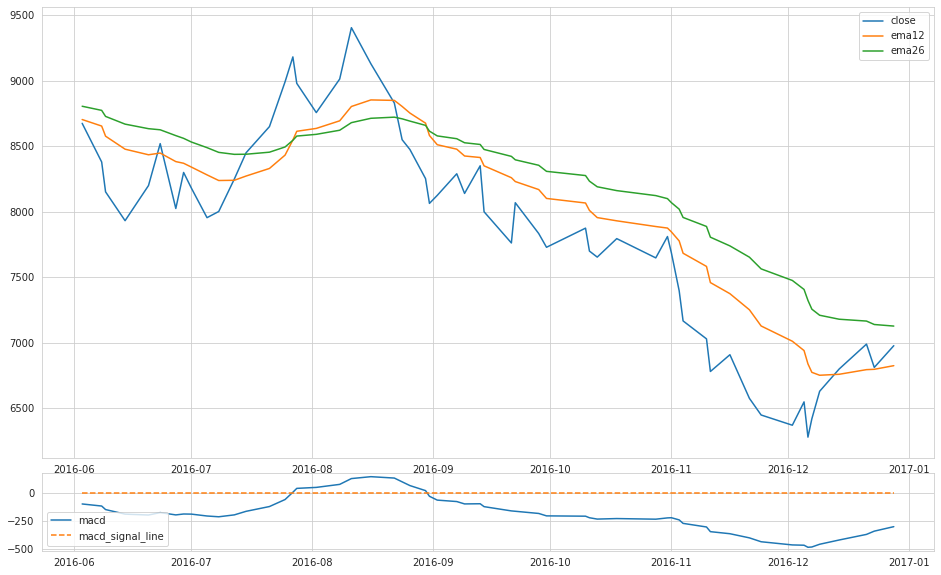

In [296]:
fig = plt.figure(figsize = (16, 10))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

data = filtered_data.loc[datetime(2016, 6, 1):datetime(2016, 12, 31)]

ax1.plot(data.index, data['close'])
ax1.plot(data.index, data['ema12'])
ax1.plot(data.index, data['ema26'])
ax1.legend(('close', 'ema12', 'ema26', ))
ax1.set_xticklabels(' ')

ax2.plot(data.index, data['macd'])
# ax2.plot(data.index, data['signal'].diff())
ax2.plot(data.index, list(itertools.repeat(0, len(data.index))), linestyle = 'dashed')
ax2.legend(('macd', 'macd_signal_line', ), loc = 'lower left')

In [297]:
%time
macd_data = pd.DataFrame()
for i, (symbol, data) in enumerate(cusumTrainPrices.items()):
    if len(data) > 12:
        data = data.copy()
        close = data['close']
        
        emalong = ta.trend.ema(close, periods = 6)
        emashort = ta.trend.ema(close, periods = 4)
        macd = emashort.sub(emalong)
        macd_ema = ta.trend.ema(macd, periods = 2)
        macd_signal = macd_ema.sub(macd)

        macd_signal.name = 'macd_signal'
        out = pd.DataFrame(macd_signal)
        out['symbol'] = symbol
        out.index.name = 'Date'
        out = out.reset_index().set_index(['Date', 'symbol'])

        macd_data = pd.concat([macd_data, out])
        # print(i, symbol)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


In [298]:
macd_data

macd_signal
Date       symbol              
2017-10-24 4SI.JO           NaN
2017-10-27 4SI.JO           NaN
2017-11-03 4SI.JO           NaN
2017-11-07 4SI.JO           NaN
2017-11-08 4SI.JO           NaN
...                         ...
2017-12-07 ZPLP.JO    -3.398759
2017-12-14 ZPLP.JO     4.433987
2017-12-15 ZPLP.JO    -3.717360
2017-12-18 ZPLP.JO   -14.605500
2017-12-20 ZPLP.JO   -15.447256

[46000 rows x 1 columns]

In [299]:
prices_data = pd.DataFrame()
for symbol, data in cusumTrainPrices.items():
    out = data['close']
    out.name = symbol
    prices_data = pd.concat([prices_data, out], axis = 1)
prices_data.index = pd.to_datetime(prices_data.index)

In [300]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = macd_data,
    prices = prices_data,
    quantiles = 3,
    periods = [1, 2, 5]
)
factor_data

Dropped 5.0% entries from factor data: 5.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D     factor  factor_quantile
date       asset                                                            
2017-11-21 4SI.JO   0.108108  0.108108  0.059459   0.231358              2.0
2017-11-22 4SI.JO   0.000000  0.000000 -0.043902  -1.027434              1.0
2017-11-27 4SI.JO   0.094972  0.094972  0.033520  -0.140949              2.0
2017-11-28 4SI.JO   0.000000  0.000000  0.020408  -0.946832              2.0
2017-12-04 4SI.JO   0.081081  0.081081  0.081081  -0.517972              2.0
...                      ...       ...       ...        ...              ...
2017-12-07 ZPLP.JO  0.000000  0.000000 -0.032101  -3.398759              1.0
2017-12-14 ZPLP.JO  0.033165  0.085258  0.115645   4.433987              3.0
2017-12-15 ZPLP.JO  0.050420  0.050420  0.079832  -3.717360              1.0
2017-12-18 ZPLP.JO  0.000000  0.028000  0.028000 -14.605500              1.0
2017-12-20 ZPLP.JO  0.000000  0.000000  0.000000 -15.447256              1.0

[43689 rows x 5 columns]

In [301]:
%time
volume_data = pd.DataFrame()
for i, (symbol, data) in enumerate(cusumTrainPrices.items()):
    if len(data) > 12:
        data = data.copy()
        volume = data['volume']
        
        vol_sma = ta.trend.ema(volume, periods = 4)

        vol_sma.name = 'volume_oscillator20'
        out = pd.DataFrame(vol_sma)
        out['symbol'] = symbol
        out.index.name = 'Date'
        out = out.reset_index().set_index(['Date', 'symbol'])

        volume_data = pd.concat([volume_data, out])
        # print(i, symbol)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


In [302]:
def createGroupingFactor(factor_data, 
                         group_data, 
                         prices_data, 
                         num_groupes = 3):
    group_factor_data = alphalens\
    .utils.get_clean_factor_and_forward_returns(
        factor = group_data,
        prices = prices_data,
        quantiles = num_groupes,
        periods = [1]
    )
    volume_factor_data

    qroup_quantiles = group_factor_data['factor_quantile']
    qroup_quantiles.name = 'group'
    factor_data_w_group = pd.concat(
        [factor_data, qroup_quantiles], 
        axis = 1).dropna()
    return factor_data_w_group

In [303]:
factor_data = createGroupingFactor(
    factor_data, 
    group_data = volume_data, 
    prices_data = prices_data, 
    num_groupes = 3)
factor_data

Dropped 2.4% entries from factor data: 2.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D     factor  factor_quantile  \
date       asset                                                              
2016-01-15 ACG.JO -0.025237 -0.041009 -0.087697   1.619174              2.0   
           CLH.JO  0.000000 -0.021197 -0.054577  16.390936              3.0   
           CND.JO  0.033059  0.033059 -0.028927   0.466069              1.0   
           CTA.JO -0.047619 -0.047619 -0.085714  -0.197524              1.0   
           DTC.JO  0.000000 -0.013802 -0.100167   7.919250              3.0   
...                     ...       ...       ...        ...              ...   
2017-12-22 TMT.JO  0.000000  0.000000  0.103321   0.812288              3.0   
           TWR.JO  0.000000  0.000000  0.022222  -0.034280              2.0   
           VOD.JO  0.000000  0.000000  0.034020  10.239389              3.0   
           WEA.JO  0.000000  0.000000  0.333333   0.000297              2.0   
           WHL.JO  0.000000  0.000000  0.035277 -13.152253              1.0   

                   group  
date       asset          
2016-01-15 ACG.JO      2  
           CLH.JO      1  
           CND.JO      1  
           CTA.JO      2  
           DTC.JO      2  
...                  ...  
2017-12-22 TMT.JO      2  
           TWR.JO      1  
           VOD.JO      3  
           WEA.JO      3  
           WHL.JO      3  

[43689 rows x 6 columns]

In [304]:
# factor_data.drop(['group'], axis = 1, inplace = True)

Returns Analysis


1D      2D      5D
Ann. alpha                                      0.545   0.411   0.185
beta                                           -0.020  -0.075   0.067
Mean Period Wise Return Top Quantile (bps)     23.408  14.402   7.548
Mean Period Wise Return Bottom Quantile (bps) -41.083 -24.932 -12.343
Mean Period Wise Spread (bps)                  64.491  39.328  19.878

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/tears.py:258: UserWarning: 'freq' not set in factor_data index: assuming business day
  UserWarning


<Figure size 432x288 with 0 Axes>

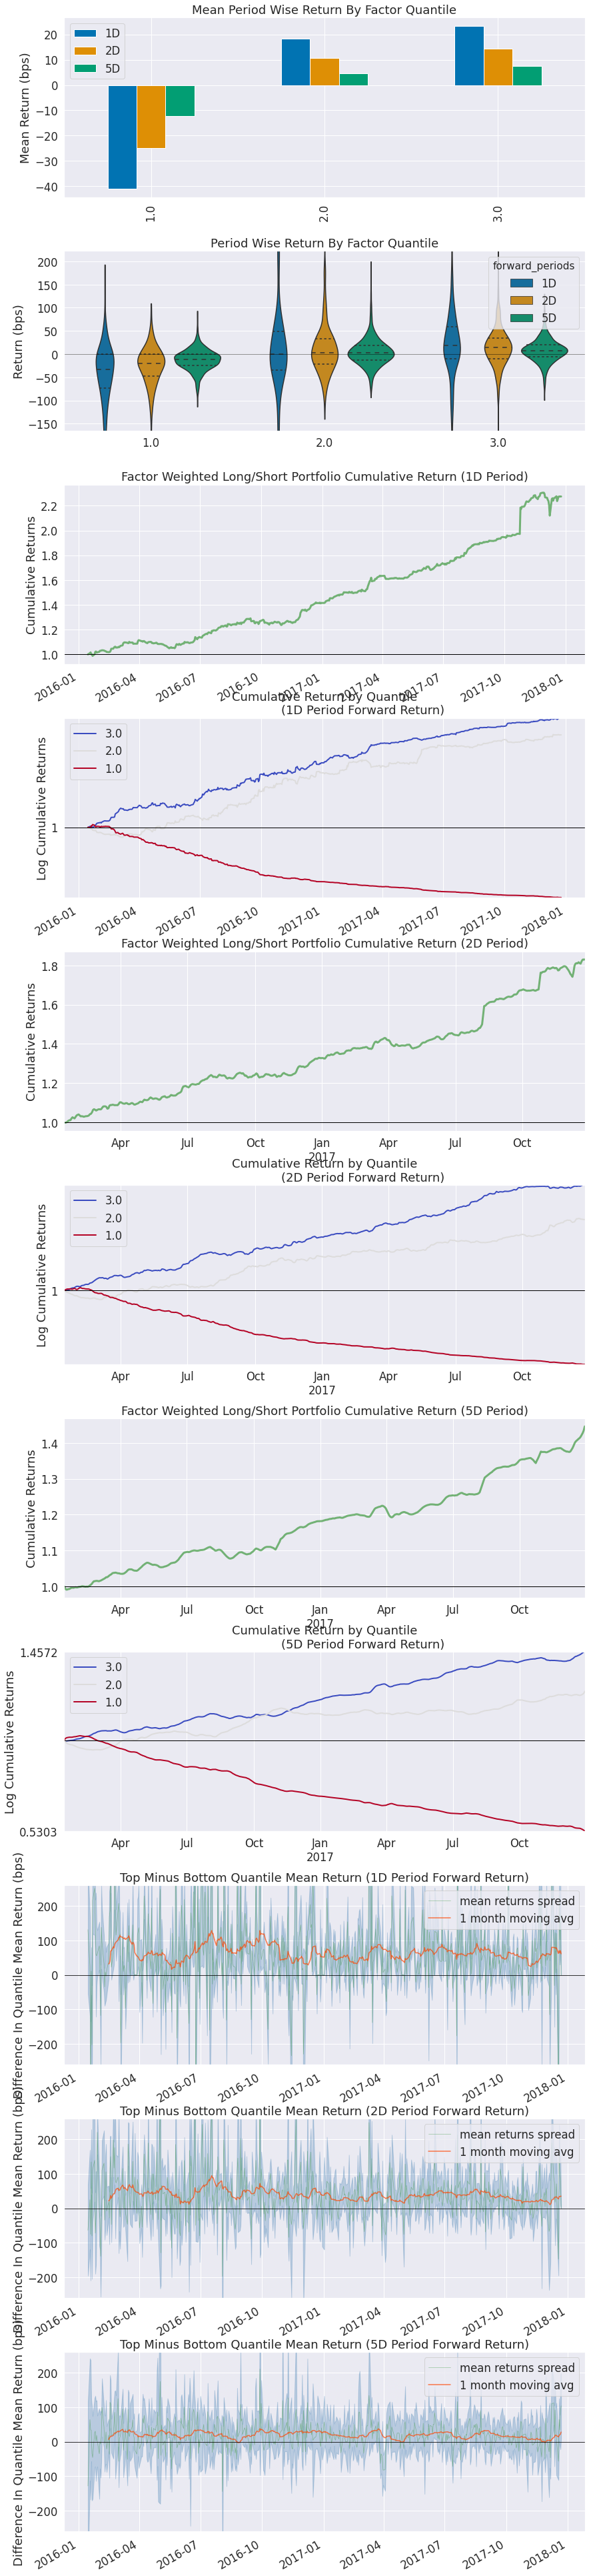

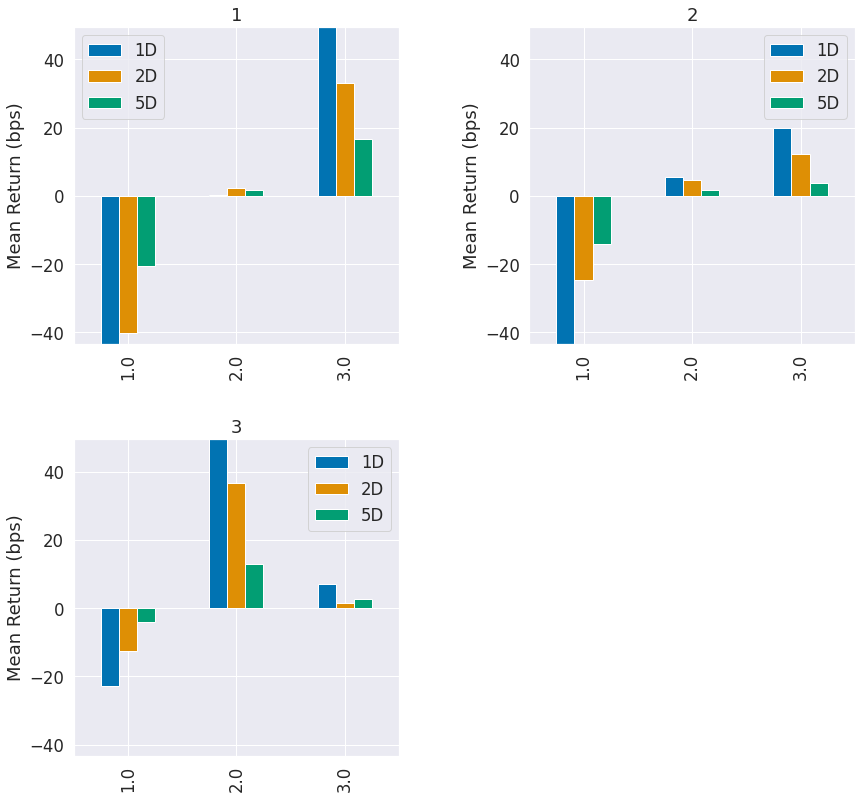

In [305]:
alphalens.tears.create_returns_tear_sheet(factor_data, by_group = True)

In [306]:
train = pd.concat([factor_data[['factor', 'group']], target], axis = 1).dropna()
train['label'] = train['label'].astype('object')
train['group'] = train['group'].astype('object')
train

factor group label
date       asset                        
2016-01-15 CLH.JO  16.390936     1     0
           CND.JO   0.466069     1     1
           CTA.JO  -0.197524     2    -1
           DTC.JO   7.919250     2     0
           MSM.JO  21.332971     2     0
...                      ...   ...   ...
2017-12-22 TBG.JO  -1.052189     1     0
           TKG.JO  -0.292083     3     0
           TMT.JO   0.812288     2     0
           TWR.JO  -0.034280     1     0
           VOD.JO  10.239389     3     0

[29723 rows x 3 columns]

In [307]:
train['label'].value_counts()

 0.0    22511
 1.0     4062
-1.0     3150
Name: label, dtype: int64

(-250.0, 250.0)

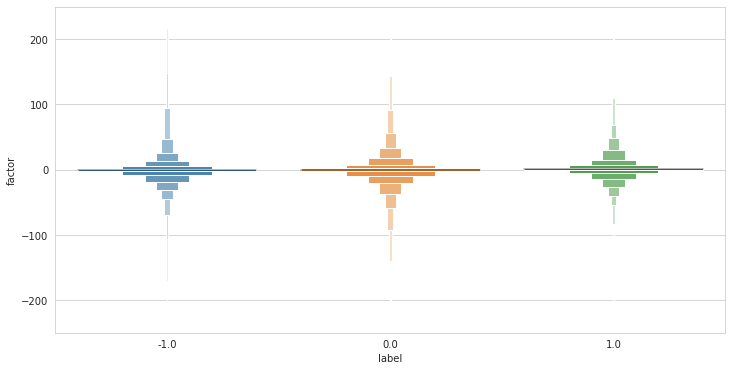

In [308]:
fig = plt.figure(figsize = (12, 6))
g = sns.boxenplot(data = train, x = 'label', y = 'factor')
g.set_ylim(-250, 250)

(-250.0, 250.0)

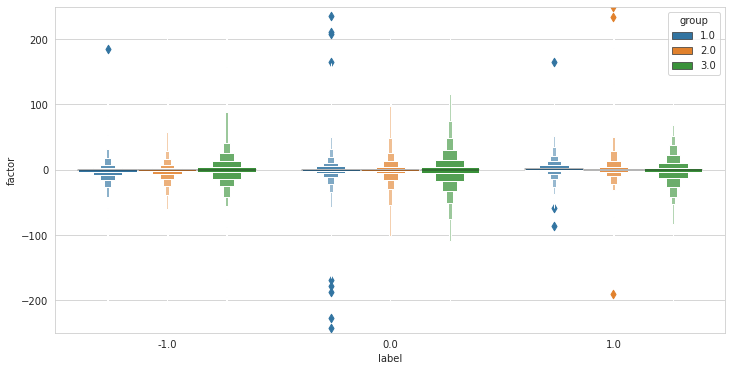

In [309]:
fig = plt.figure(figsize = (12, 6))
g = sns.boxenplot(data = train, x = 'label', y = 'factor', hue = 'group')
g.set_ylim(-250, 250)

#### Perfomance evaluation

In [310]:
train['label'] = train['label'].astype('int')
train['group'] = train['group'].astype('int')
X = train[['factor', 'group']]
y = train['label'].astype('int')

In [311]:
def upsamplingCV(clf, X, y, cv):

    predictions = pd.DataFrame()
    probabilities = pd.DataFrame()
    kf = KFold(n_splits = cv)
    for train_index, test_index in kf.split(X, y):

        train_X = X.iloc[train_index, ]
        train_y = y.iloc[train_index]

        test_X = X.iloc[test_index, ]
        test_y = y.iloc[test_index]

        target_counts = train_y.value_counts()
        positive_counts = target_counts[1]
        neutral_counts = target_counts[0]
        negative_counts = target_counts[-1]

        out = pd.DataFrame()
        for label_counts in ['positive_counts', 'negative_counts']:

            if label_counts == 'positive_counts':
                minority_mask = train_y == 1
                majority_mask = train_y == 0

            if label_counts == 'negative_counts':
                minority_mask = train_y == -1
                majority_mask = train_y == 0


            minority_df = train_X[minority_mask].copy()
            minority_df['label'] = train_y[minority_mask]

            majority_df = train_X[majority_mask].copy()
            majority_df['label'] = train_y[majority_mask]

            upsampled_minority_df = resample(
                minority_df, 
                replace = True, 
                n_samples = len(majority_df), 
                random_state = 42)

            out = pd.concat(
                [out, upsampled_minority_df])

        upsampled_df = pd.concat(
            [majority_df, out])

        upsampled_train_X = upsampled_df.drop(
            'label', axis = 1)
        upsampled_y = upsampled_df['label']


        n_classes = 3
        upsampled_y = pd.DataFrame(label_binarize(
            upsampled_y, 
            classes = [-1, 0, 1]),
            index = upsampled_y.index,
            columns = [-1, 0, 1])

        model = OneVsRestClassifier(clf)
        model.fit(
            upsampled_train_X, 
            upsampled_y)

        probs = model.predict_proba(test_X)
        probs = pd.DataFrame(
            probs, 
            index = test_y.index, 
            columns = upsampled_y.columns)


        probabilities = pd.concat(
            [probabilities, probs])

    return probabilities

In [312]:
probabilities = upsamplingCV(
    clf = LogisticRegression(
        random_state = 42), 
    X = X, 
    y = y, 
    cv = 10)

In [313]:
def convertToMultiClass(y):
    classes = [-1, 0, 1]
    transformed_y = pd.DataFrame(label_binarize(
        y, 
        classes = classes),
        index = y.index,
        columns = [-1, 0, 1])
    return transformed_y

In [314]:
true_y = convertToMultiClass(y)

In [317]:
def plotROC(true_y, probabilities):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    classes = [-1, 0.0, 1]
    roc_auc = dict()
    for i, label in enumerate(classes):
        fpr[i], tpr[i], _ = roc_curve(true_y.iloc[:, i], probabilities.iloc[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot of a ROC curve for a specific class
    for i, label in enumerate(classes):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        if label == 1:
            plt.title('ROC - long')
        elif label == -1:
            plt.title('ROC - short')
        elif label == 0:
            plt.title('ROC - exit')
        plt.legend(loc="lower right")
        plt.show()

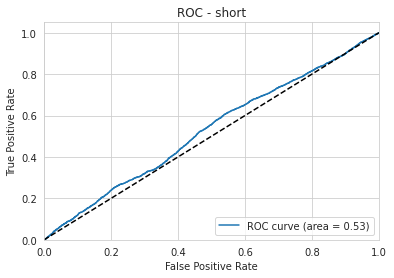

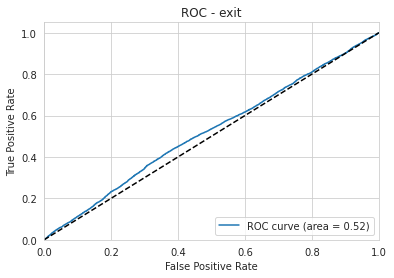

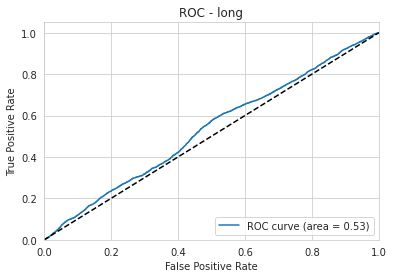

In [318]:
plotROC(true_y, probabilities)

### Bollinger Bands

In [319]:
data = cusumTrainPrices['WHL.JO'].copy()
close = data['close']
n = 12
data['movav'] = ta.trend.sma(close, periods = n)
data['upper'] = ta.volatility.bollinger_hband(close, n = n, ndev = 2)
data['lower'] = ta.volatility.bollinger_lband(close, n = n, ndev = 2)

data['perc_b'] = (close - data['lower'])/(data['upper'] - data['lower'])

data['mfi'] = ta.volume.MFIIndicator(
    data['high'], data['low'], close, data['volume'], n = n)\
    .money_flow_index()

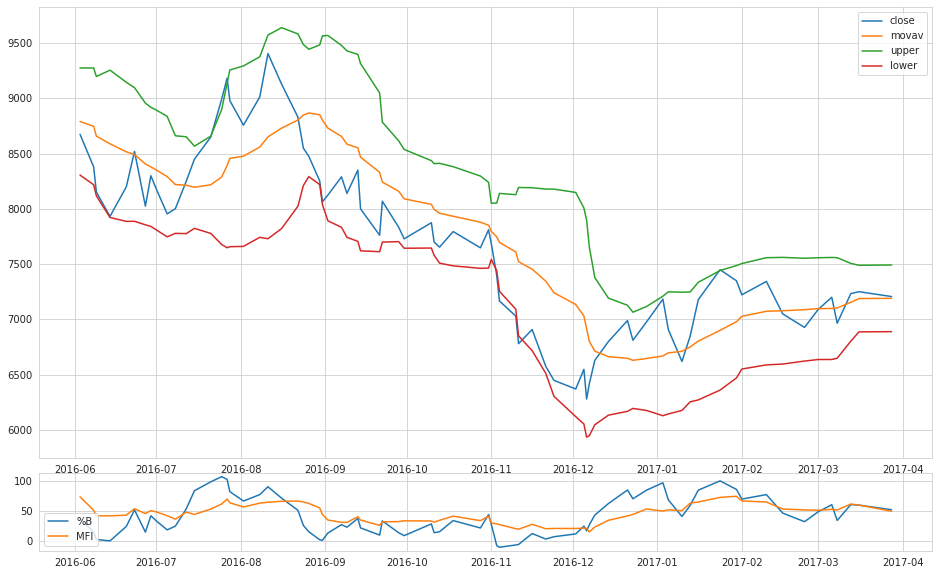

In [320]:
fig = plt.figure(figsize = (16, 10))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

data = data.loc[datetime(2016, 6, 1):datetime(2017, 3, 28)]

ax1.plot(data.index, data['close'])
ax1.plot(data.index, data['movav'])
ax1.plot(data.index, data['upper'])
ax1.plot(data.index, data['lower'])
ax1.legend(('close', 'movav', 'upper', 'lower', ))
ax1.set_xticklabels(' ')

ax2.plot(data.index, data['perc_b'] * 100)
ax2.plot(data.index, data['mfi'])
# ax2.plot(data.index, data['signal'])
# ax2.plot(data.index, data['signal'].diff())
# ax2.plot(data.index, list(itertools.repeat(0, len(data.index))), linestyle = 'dashed')
ax2.legend(('%B', 'MFI', ), loc = 'lower left')

In [321]:
%time
bbands_data = pd.DataFrame()
for i, (symbol, data) in enumerate(cusumTrainPrices.items()):
    if len(data) > 12:
        data = data.copy()
        close = data['close']
        
        n = 12
#         data['movav'] = ta.trend.sma(close, periods = n)
        upper = ta.volatility.bollinger_hband(close, n = n, ndev = 2)
        lower = ta.volatility.bollinger_lband(close, n = n, ndev = 2)

        perc_b = (close - lower)/(upper - lower) * -1
        perc_b.name = 'perc_b'

        out = pd.DataFrame(perc_b)
        out['symbol'] = symbol
        out.index.name = 'Date'
        out = out.reset_index().set_index(['Date', 'symbol'])

        bbands_data = pd.concat([bbands_data, out])
        # print(i, symbol)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


In [322]:
bbands_data

perc_b
Date       symbol           
2017-10-24 4SI.JO        NaN
2017-10-27 4SI.JO        NaN
2017-11-03 4SI.JO        NaN
2017-11-07 4SI.JO        NaN
2017-11-08 4SI.JO        NaN
...                      ...
2017-12-07 ZPLP.JO -0.605137
2017-12-14 ZPLP.JO -0.274010
2017-12-15 ZPLP.JO -0.716021
2017-12-18 ZPLP.JO -1.154073
2017-12-20 ZPLP.JO -1.110373

[46000 rows x 1 columns]

In [323]:
bbands_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = bbands_data,
    prices = prices_data,
    quantiles = 3,
    periods = [1, 2, 5]
)
bbands_factor_data

Dropped 8.8% entries from factor data: 8.8% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D    factor  factor_quantile
date       asset                                                           
2017-12-05 4SI.JO   0.000000  0.000000  0.000000 -0.393918              2.0
2017-12-13 4SI.JO  -0.076087  0.032609 -0.076087 -0.289029              2.0
2017-12-14 4SI.JO   0.117647  0.117647  0.000000 -0.181162              3.0
2017-12-15 4SI.JO   0.000000  0.000000 -0.105263 -0.447809              2.0
2017-12-20 4SI.JO   0.000000  0.000000  0.058824 -0.119948              3.0
...                      ...       ...       ...       ...              ...
2017-12-07 ZPLP.JO  0.000000  0.000000 -0.032101 -0.605137              1.0
2017-12-14 ZPLP.JO  0.033165  0.085258  0.115645 -0.274010              3.0
2017-12-15 ZPLP.JO  0.050420  0.050420  0.079832 -0.716021              1.0
2017-12-18 ZPLP.JO  0.000000  0.028000  0.028000 -1.154073              1.0
2017-12-20 ZPLP.JO  0.000000  0.000000  0.000000 -1.110373              1.0

[41973 rows x 5 columns]

In [324]:
%time
mfi_data = pd.DataFrame()
for i, (symbol, data) in enumerate(cusumTrainPrices.items()):
    if len(data) > 12:
        data = data.copy()
        close = data['close']
        
        n = 12
        
        mfi = ta.volume.MFIIndicator(
            data['high'], data['low'], close, data['volume'], n = n)\
            .money_flow_index()
        mfi.name = 'mfi'

        out = pd.DataFrame(mfi)
        out['symbol'] = symbol
        out.index.name = 'Date'
        out = out.reset_index().set_index(['Date', 'symbol'])

        mfi_data = pd.concat([mfi_data, out])
        # print(i, symbol)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


In [331]:
# bbands_factor_data.drop('group', axis = 1, inplace = True)

In [332]:
bbands_factor_data = createGroupingFactor(
    bbands_factor_data, 
    group_data = mfi_data, 
    prices_data = prices_data, 
    num_groupes = 2)
bbands_factor_data

Dropped 8.5% entries from factor data: 8.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D    factor  factor_quantile  group
date       asset                                                            
2016-01-26 ACG.JO  0.0  0.000000  0.000000 -0.319205              3.0    1.0
           KIO.JO  0.0  0.000000  0.114242 -0.741387              1.0    2.0
2016-01-28 ADH.JO  0.0  0.000000  0.025000 -0.359306              3.0    1.0
           AVV.JO  0.0  0.018095  0.095238 -0.406639              2.0    1.0
           CLH.JO  0.0  0.000000  0.014472 -0.798754              1.0    2.0
...                ...       ...       ...       ...              ...    ...
2017-12-22 TMT.JO  0.0  0.000000  0.103321 -0.195733              3.0    2.0
           TWR.JO  0.0  0.000000  0.022222 -0.184603              3.0    1.0
           VOD.JO  0.0  0.000000  0.034020 -0.243037              3.0    1.0
           WEA.JO  0.0  0.000000  0.333333 -0.351217              2.0    2.0
           WHL.JO  0.0  0.000000  0.035277 -0.982370              1.0    2.0

[41927 rows x 6 columns]

Returns Analysis


1D      2D      5D
Ann. alpha                                       1.753   1.213   0.501
beta                                             0.677   0.052  -0.012
Mean Period Wise Return Top Quantile (bps)      64.956  36.152  17.143
Mean Period Wise Return Bottom Quantile (bps)  -44.897 -25.327 -12.925
Mean Period Wise Spread (bps)                  109.852  61.403  30.024

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/tears.py:258: UserWarning: 'freq' not set in factor_data index: assuming business day
  UserWarning


<Figure size 432x288 with 0 Axes>

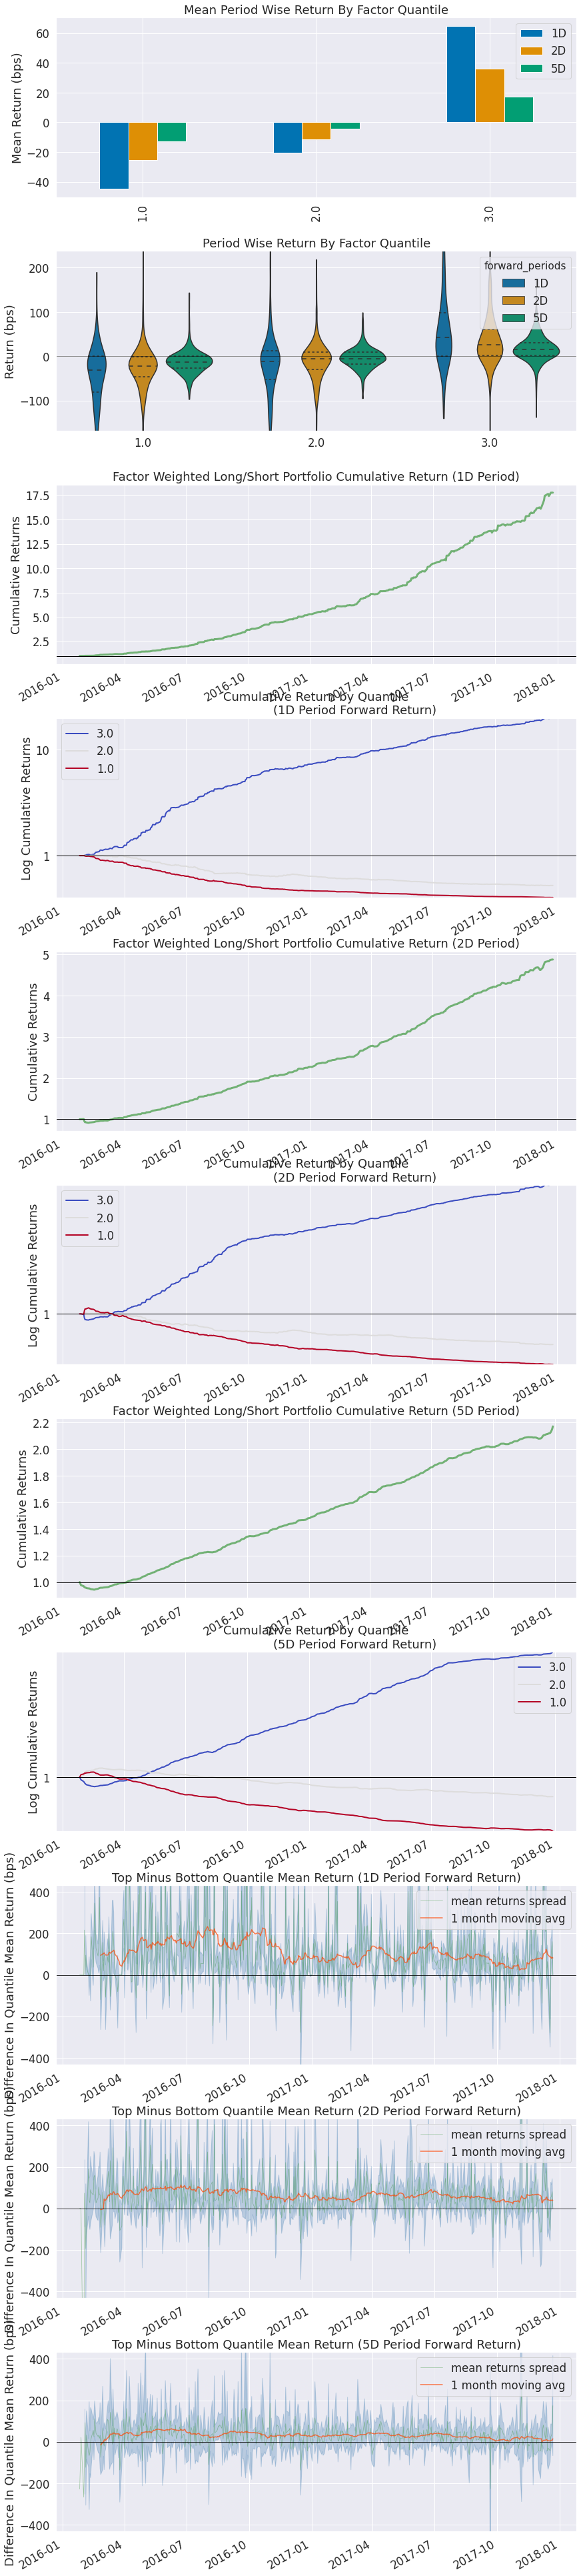

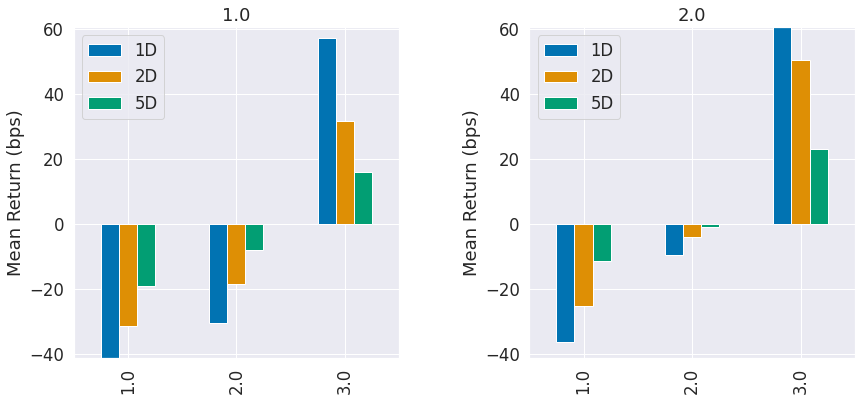

In [333]:
alphalens.tears.create_returns_tear_sheet(bbands_factor_data, by_group = True)

In [334]:
mfi = pd.concat([bbands_factor_data['group'], mfi_data], axis = 1).dropna()
mfi.groupby('group').mean()

mfi
group           
1.0    33.235603
2.0    71.317442

In [335]:
train.rename(columns = {'group':'volume_group', 'factor':'macd'}, inplace = True)
train

macd  volume_group  label
date       asset                                 
2016-01-15 CLH.JO  16.390936             1      0
           CND.JO   0.466069             1      1
           CTA.JO  -0.197524             2     -1
           DTC.JO   7.919250             2      0
           MSM.JO  21.332971             2      0
...                      ...           ...    ...
2017-12-22 TBG.JO  -1.052189             1      0
           TKG.JO  -0.292083             3      0
           TMT.JO   0.812288             2      0
           TWR.JO  -0.034280             1      0
           VOD.JO  10.239389             3      0

[29723 rows x 3 columns]

In [336]:
bb_factor = bbands_factor_data['factor']
bb_factor.name = 'bbands'
bb_mfi_group = bbands_factor_data['group']
bb_mfi_group.name = 'mfi_group'
train = pd.concat([train, bb_factor, bb_mfi_group], axis = 1).dropna()
train

macd  volume_group  label    bbands  mfi_group
date       asset                                                      
2016-01-26 KIO.JO -23.590876           3.0    0.0 -0.741387        2.0
2016-01-28 ADH.JO  -1.386143           2.0    0.0 -0.359306        1.0
           AVV.JO  -3.129032           2.0    0.0 -0.406639        1.0
           CLH.JO -65.008460           1.0    0.0 -0.798754        2.0
2016-02-01 AVV.JO  -3.114800           3.0    0.0 -0.516013        2.0
...                      ...           ...    ...       ...        ...
2017-12-22 TBG.JO  -1.052189           1.0    0.0 -0.359244        2.0
           TKG.JO  -0.292083           3.0    0.0 -0.198260        1.0
           TMT.JO   0.812288           2.0    0.0 -0.195733        2.0
           TWR.JO  -0.034280           1.0    0.0 -0.184603        1.0
           VOD.JO  10.239389           3.0    0.0 -0.243037        1.0

[28357 rows x 5 columns]

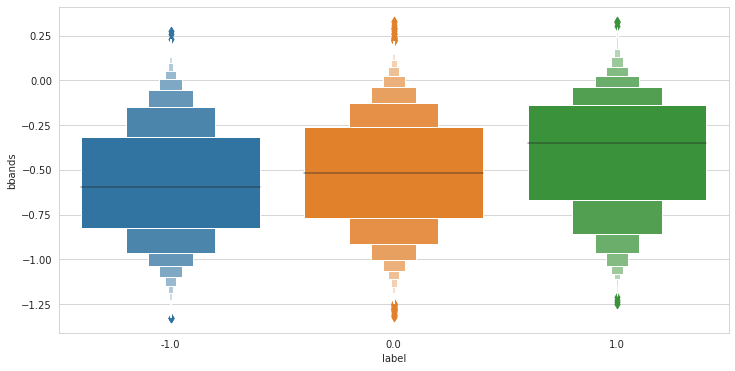

In [337]:
fig = plt.figure(figsize = (12, 6))
g = sns.boxenplot(data = train, x = 'label', y = 'bbands')

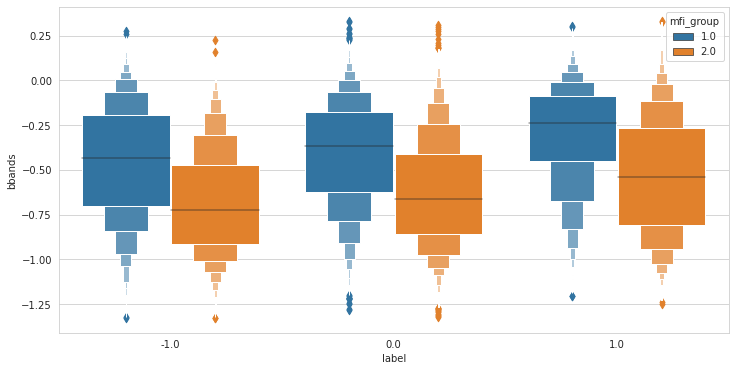

In [338]:
fig = plt.figure(figsize = (12, 6))
g = sns.boxenplot(data = train, x = 'label', y = 'bbands', hue = 'mfi_group')

#### Perfomance evaluation

In [339]:
X = train[['macd', 'volume_group', 'bbands', 'mfi_group']]
y = train['label'].astype('int')

In [340]:
X.loc[:, 'volume_group'] = X.loc[:, 'volume_group'].astype('object')
X.loc[:, 'mfi_group'] = X.loc[:, 'mfi_group'].astype('object')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [341]:
X = pd.get_dummies(X, drop_first = True)
X

macd    bbands  volume_group_2.0  volume_group_3.0  \
date       asset                                                             
2016-01-26 KIO.JO -23.590876 -0.741387                 0                 1   
2016-01-28 ADH.JO  -1.386143 -0.359306                 1                 0   
           AVV.JO  -3.129032 -0.406639                 1                 0   
           CLH.JO -65.008460 -0.798754                 0                 0   
2016-02-01 AVV.JO  -3.114800 -0.516013                 0                 1   
...                      ...       ...               ...               ...   
2017-12-22 TBG.JO  -1.052189 -0.359244                 0                 0   
           TKG.JO  -0.292083 -0.198260                 0                 1   
           TMT.JO   0.812288 -0.195733                 1                 0   
           TWR.JO  -0.034280 -0.184603                 0                 0   
           VOD.JO  10.239389 -0.243037                 0                 1   

                   mfi_group_2.0  
date       asset                  
2016-01-26 KIO.JO              1  
2016-01-28 ADH.JO              0  
           AVV.JO              0  
           CLH.JO              1  
2016-02-01 AVV.JO              1  
...                          ...  
2017-12-22 TBG.JO              1  
           TKG.JO              0  
           TMT.JO              1  
           TWR.JO              0  
           VOD.JO              0  

[28357 rows x 5 columns]

In [342]:
probabilities = upsamplingCV(
    clf = LogisticRegression(
        random_state = 42), 
    X = X, 
    y = y, 
    cv = 10)

In [343]:
true_y = convertToMultiClass(y)

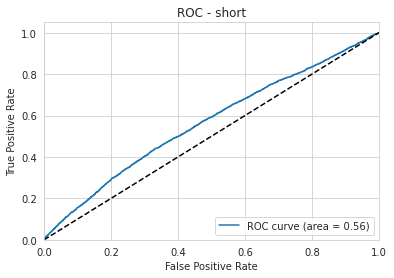

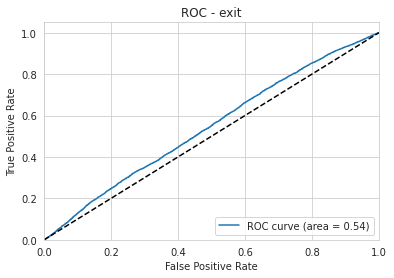

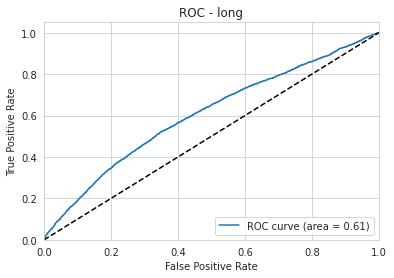

In [344]:
plotROC(true_y, probabilities)

### Residual Strength Index

In [345]:
%time
rsi_data = pd.DataFrame()
for i, (symbol, data) in enumerate(cusumTrainPrices.items()):
    if len(data) > 12:
        data = data.copy()
        close = data['close']
        
        n = 5
        rsi = ta.momentum.RSIIndicator(data['close'], n = n).rsi() * -1
        rsi.name = 'rsi'

        out = pd.DataFrame(rsi)
        out['symbol'] = symbol
        out.index.name = 'Date'
        out = out.reset_index().set_index(['Date', 'symbol'])

        rsi_data = pd.concat([rsi_data, out])
        # print(i, symbol)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


In [346]:
rsi_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = rsi_data,
    prices = prices_data,
    quantiles = 3,
    periods = [1, 2, 5]
)
rsi_factor_data

Dropped 3.5% entries from factor data: 3.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D     factor  factor_quantile
date       asset                                                            
2017-11-08 4SI.JO   0.000000  0.129730  0.129730  -0.000000                3
2017-11-10 4SI.JO   0.000000  0.000000  0.000000 -27.292576                3
2017-11-21 4SI.JO   0.108108  0.108108  0.059459 -20.350020                3
2017-11-22 4SI.JO   0.000000  0.000000 -0.043902 -37.034306                3
2017-11-27 4SI.JO   0.094972  0.094972  0.033520 -27.629524                3
...                      ...       ...       ...        ...              ...
2017-12-07 ZPLP.JO  0.000000  0.000000 -0.032101 -55.858814                1
2017-12-14 ZPLP.JO  0.033165  0.085258  0.115645 -44.379326                2
2017-12-15 ZPLP.JO  0.050420  0.050420  0.079832 -55.747249                1
2017-12-18 ZPLP.JO  0.000000  0.028000  0.028000 -68.419666                1
2017-12-20 ZPLP.JO  0.000000  0.000000  0.000000 -73.874802                1

[44376 rows x 5 columns]

Returns Analysis


1D      2D      5D
Ann. alpha                                      1.407   0.809   0.381
beta                                            0.483   0.260   0.067
Mean Period Wise Return Top Quantile (bps)     55.754  33.656  15.959
Mean Period Wise Return Bottom Quantile (bps) -42.880 -26.352 -11.970
Mean Period Wise Spread (bps)                  98.634  59.954  27.908

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/tears.py:258: UserWarning: 'freq' not set in factor_data index: assuming business day
  UserWarning


<Figure size 432x288 with 0 Axes>

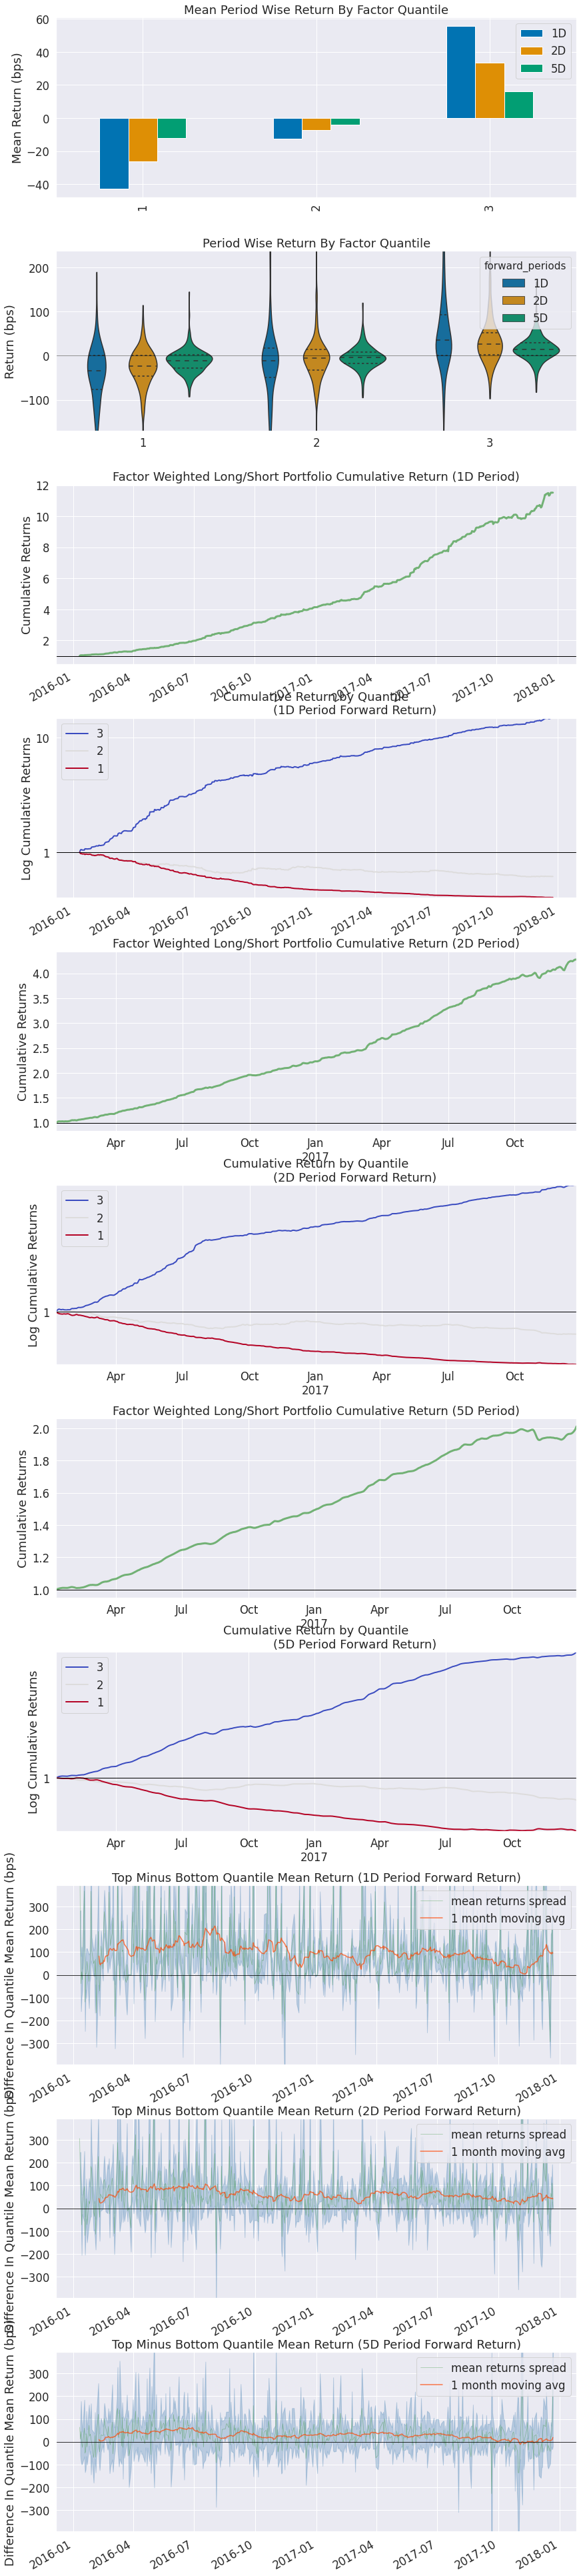

In [347]:
alphalens.tears.create_returns_tear_sheet(rsi_factor_data)

In [348]:
rsi = rsi_factor_data['factor']
rsi.name = 'rsi'
train = pd.concat([train, rsi], axis = 1).dropna()
train

macd  volume_group  label    bbands  mfi_group  \
date       asset                                                         
2016-01-26 KIO.JO -23.590876           3.0    0.0 -0.741387        2.0   
2016-01-28 ADH.JO  -1.386143           2.0    0.0 -0.359306        1.0   
           AVV.JO  -3.129032           2.0    0.0 -0.406639        1.0   
           CLH.JO -65.008460           1.0    0.0 -0.798754        2.0   
2016-02-01 AVV.JO  -3.114800           3.0    0.0 -0.516013        2.0   
...                      ...           ...    ...       ...        ...   
2017-12-22 TBG.JO  -1.052189           1.0    0.0 -0.359244        2.0   
           TKG.JO  -0.292083           3.0    0.0 -0.198260        1.0   
           TMT.JO   0.812288           2.0    0.0 -0.195733        2.0   
           TWR.JO  -0.034280           1.0    0.0 -0.184603        1.0   
           VOD.JO  10.239389           3.0    0.0 -0.243037        1.0   

                         rsi  
date       asset              
2016-01-26 KIO.JO -73.004596  
2016-01-28 ADH.JO -45.278584  
           AVV.JO -48.375253  
           CLH.JO -67.652467  
2016-02-01 AVV.JO -54.667006  
...                      ...  
2017-12-22 TBG.JO -47.855572  
           TKG.JO -25.709500  
           TMT.JO -36.301073  
           TWR.JO -36.854664  
           VOD.JO -38.258599  

[28357 rows x 6 columns]

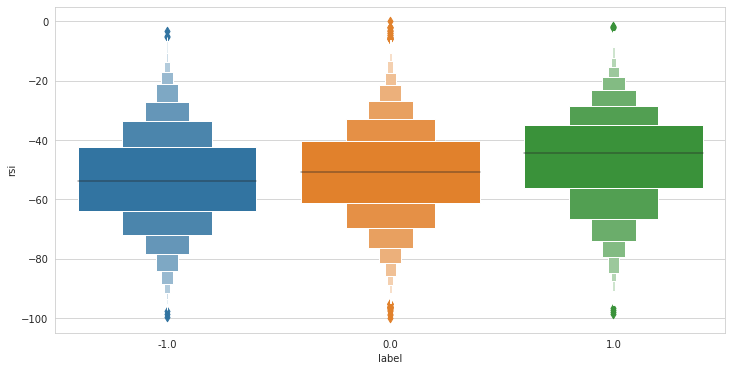

In [349]:
fig = plt.figure(figsize = (12, 6))
g = sns.boxenplot(data = train, x = 'label', y = 'rsi')

In [350]:
%time
tsi_data = pd.DataFrame()
for i, (symbol, data) in enumerate(cusumTrainPrices.items()):
    if len(data) > 12:
        data = data.copy()
        close = data['close']
        
        tsi = ta.momentum.TSIIndicator(data['close'], r = 9, s = 5).tsi() * -1
        tsi.name = 'tsi'

        out = pd.DataFrame(tsi)
        out['symbol'] = symbol
        out.index.name = 'Date'
        out = out.reset_index().set_index(['Date', 'symbol'])

        tsi_data = pd.concat([tsi_data, out])
        # print(i, symbol)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs


In [351]:
tsi_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = tsi_data,
    prices = prices_data,
    quantiles = 3,
    periods = [1, 2, 5]
)
tsi_factor_data

Dropped 10.2% entries from factor data: 10.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D     factor  factor_quantile
date       asset                                                            
2017-12-14 4SI.JO   0.117647  0.117647  0.000000  34.817241              3.0
2017-12-15 4SI.JO   0.000000  0.000000 -0.105263  27.677598              3.0
2017-12-20 4SI.JO   0.000000  0.000000  0.058824  28.710890              3.0
2016-02-15 ABG.JO   0.000000  0.000000 -0.035550 -29.761175              1.0
2016-02-18 ABG.JO  -0.038491 -0.038491 -0.062754 -36.225169              1.0
...                      ...       ...       ...        ...              ...
2017-12-07 ZPLP.JO  0.000000  0.000000 -0.032101  -4.278668              2.0
2017-12-14 ZPLP.JO  0.033165  0.085258  0.115645   1.100892              2.0
2017-12-15 ZPLP.JO  0.050420  0.050420  0.079832  -3.223269              1.0
2017-12-18 ZPLP.JO  0.000000  0.028000  0.028000 -15.526806              1.0
2017-12-20 ZPLP.JO  0.000000  0.000000  0.000000 -26.701480              1.0

[41287 rows x 5 columns]

Returns Analysis


1D      2D      5D
Ann. alpha                                      0.540   0.331   0.216
beta                                            0.216   0.054  -0.161
Mean Period Wise Return Top Quantile (bps)     22.010  12.254   6.658
Mean Period Wise Return Bottom Quantile (bps) -25.963 -13.224  -6.717
Mean Period Wise Spread (bps)                  47.973  25.444  13.347

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/tears.py:258: UserWarning: 'freq' not set in factor_data index: assuming business day
  UserWarning


<Figure size 432x288 with 0 Axes>

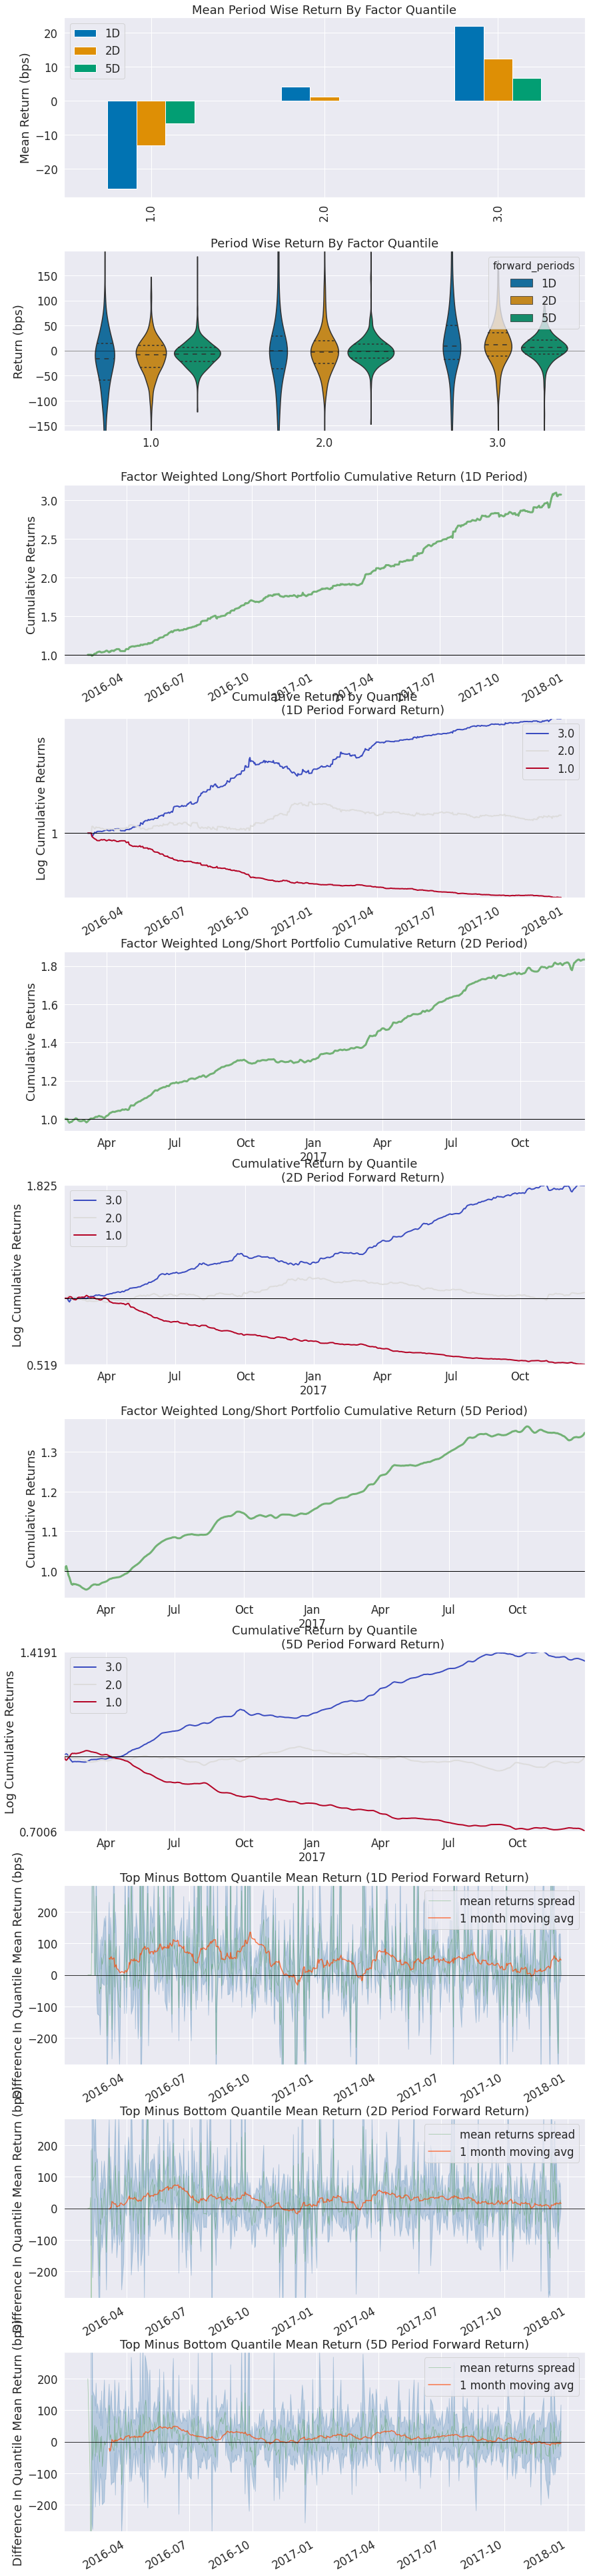

In [352]:
alphalens.tears.create_returns_tear_sheet(tsi_factor_data)

In [353]:
tsi = tsi_factor_data['factor']
tsi.name = 'tsi'
train = pd.concat([train, tsi], axis = 1).dropna()
train

macd  volume_group  label    bbands  mfi_group  \
date       asset                                                          
2016-02-05 CLH.JO   -3.644586           1.0    0.0 -0.658441        2.0   
           CPI.JO -156.731026           2.0    0.0 -0.791709        1.0   
2016-02-08 ADH.JO   -0.123869           3.0    0.0 -0.446604        1.0   
           OMN.JO   -7.361053           2.0    0.0 -0.392681        1.0   
2016-02-09 INP.JO   13.251214           3.0    0.0  0.004101        1.0   
...                       ...           ...    ...       ...        ...   
2017-12-22 TBG.JO   -1.052189           1.0    0.0 -0.359244        2.0   
           TKG.JO   -0.292083           3.0    0.0 -0.198260        1.0   
           TMT.JO    0.812288           2.0    0.0 -0.195733        2.0   
           TWR.JO   -0.034280           1.0    0.0 -0.184603        1.0   
           VOD.JO   10.239389           3.0    0.0 -0.243037        1.0   

                         rsi        tsi  
date       asset                         
2016-02-05 CLH.JO -56.145241 -16.685254  
           CPI.JO -61.846904   3.314171  
2016-02-08 ADH.JO -47.258540   2.420310  
           OMN.JO -46.714212  26.237916  
2016-02-09 INP.JO -34.152406  25.076315  
...                      ...        ...  
2017-12-22 TBG.JO -47.855572   9.645242  
           TKG.JO -25.709500  42.556239  
           TMT.JO -36.301073   8.125808  
           TWR.JO -36.854664  24.097336  
           VOD.JO -38.258599  15.317280  

[27822 rows x 7 columns]

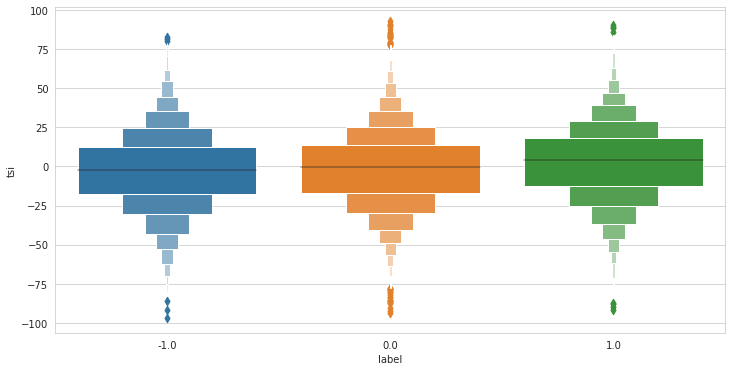

In [354]:
fig = plt.figure(figsize = (12, 6))
g = sns.boxenplot(data = train, x = 'label', y = 'tsi')

#### Perfomance evaluation

In [355]:
X = train[['macd', 'volume_group', 'bbands', 'mfi_group', 'rsi', 'tsi']]
y = train['label'].astype('int')
X.loc[:, 'volume_group'] = X.loc[:, 'volume_group'].astype('object')
X.loc[:, 'mfi_group'] = X.loc[:, 'mfi_group'].astype('object')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [356]:
X = pd.get_dummies(X, drop_first = True)
X

macd    bbands        rsi        tsi  \
date       asset                                                
2016-02-05 CLH.JO   -3.644586 -0.658441 -56.145241 -16.685254   
           CPI.JO -156.731026 -0.791709 -61.846904   3.314171   
2016-02-08 ADH.JO   -0.123869 -0.446604 -47.258540   2.420310   
           OMN.JO   -7.361053 -0.392681 -46.714212  26.237916   
2016-02-09 INP.JO   13.251214  0.004101 -34.152406  25.076315   
...                       ...       ...        ...        ...   
2017-12-22 TBG.JO   -1.052189 -0.359244 -47.855572   9.645242   
           TKG.JO   -0.292083 -0.198260 -25.709500  42.556239   
           TMT.JO    0.812288 -0.195733 -36.301073   8.125808   
           TWR.JO   -0.034280 -0.184603 -36.854664  24.097336   
           VOD.JO   10.239389 -0.243037 -38.258599  15.317280   

                   volume_group_2.0  volume_group_3.0  mfi_group_2.0  
date       asset                                                      
2016-02-05 CLH.JO                 0                 0              1  
           CPI.JO                 1                 0              0  
2016-02-08 ADH.JO                 0                 1              0  
           OMN.JO                 1                 0              0  
2016-02-09 INP.JO                 0                 1              0  
...                             ...               ...            ...  
2017-12-22 TBG.JO                 0                 0              1  
           TKG.JO                 0                 1              0  
           TMT.JO                 1                 0              1  
           TWR.JO                 0                 0              0  
           VOD.JO                 0                 1              0  

[27822 rows x 7 columns]

In [360]:
probabilities = upsamplingCV(
    clf = LogisticRegression(
        random_state = 42), 
    X = X, 
    y = y, 
    cv = 10)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

In [361]:
true_y = convertToMultiClass(y)

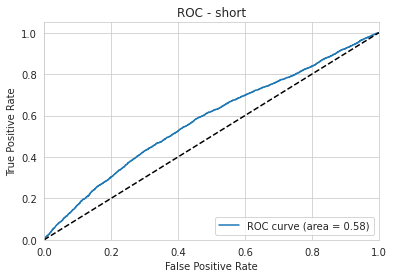

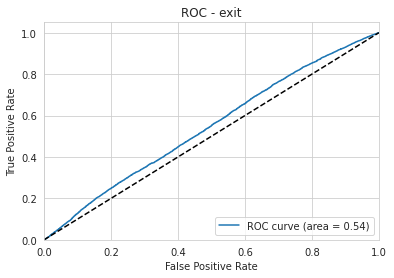

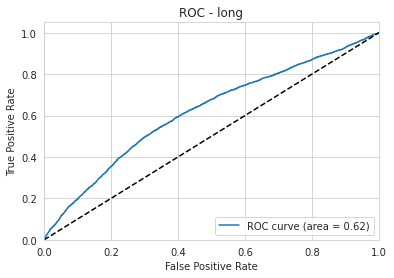

In [362]:
plotROC(true_y, probabilities)

## Predictive Modeling and Perfomance Evaluation

### Machine Learning

### Neural Networks and Deep Learning

### Model Perfomance and Selection

## WalkForward Analysis

In [ ]:
# wf_start_date = macd_data.dropna().reset_index().sort_values('date')['date'][0]
wf_start_date = datetime(2016, 3, 1)
wf_start_date

In [ ]:
training_window = 66
testing_window = 22

In [ ]:
def getPrices(data, start_date, training_window = None, test = False, testing_window = None):
    prices = data.loc[start_date: ].copy()
    if not test:
        prices_df = prices.iloc[:training_window]
    else:
        prices_df = prices.iloc[training_window:training_window + testing_window]
    prices_df.index = pd.to_datetime(prices_df.index)
    return prices_df

In [ ]:
train_prices = getPrices(data = prices_data, start_date=wf_start_date, training_window=training_window)
test_prices = getPrices(data = prices_data, start_date=wf_start_date, training_window=training_window, test = True, testing_window=testing_window)

In [ ]:
def getFactor(indicator, date_range):
    
    factor = indicator.reset_index()
    factor_filtered = factor[factor['date'].isin(date_range)].set_index(['date', 'asset'])
    return factor_filtered

In [ ]:
macd_data_train = getFactor(indicator = macd_data, date_range = train_prices.index)
volume_data_train = getFactor(indicator = volume_data, date_range = train_prices.index)

macd_data_test = getFactor(indicator = macd_data, date_range = test_prices.index)
volume_data_test = getFactor(indicator = volume_data, date_range = test_prices.index)

In [ ]:
def getCleanFactorData(factor, prices, quantiles = 3):
    factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
        factor = factor, 
        prices = prices, 
        quantiles = quantiles, 
        max_loss = 0.75)
    return factor_data

In [ ]:
macd_factor_data_train = getCleanFactorData(factor = macd_data_train, prices = train_prices, quantiles = 3)
volume_factor_data_train = getCleanFactorData(factor = volume_data_train, prices = train_prices, quantiles = 3)

macd_factor_data_test = getCleanFactorData(factor = macd_data_test, prices = test_prices, quantiles = 3)
volume_factor_data_test = getCleanFactorData(factor = volume_data_test, prices = test_prices, quantiles = 3)

In [ ]:
def getData(macd_factor_data, volume_factor_data):
    macd_sig = macd_factor_data['factor']
    macd_sig.name = 'macd_sig'

    volume_bins = volume_factor_data['factor_quantile']
    volume_bins.name = 'volume_bins'

    target = macd_factor_data['1D']
    target.name = 'target'

    data = pd.concat([macd_sig, volume_bins, target], axis = 1)
    return data

In [ ]:
train = getData(macd_factor_data_train, volume_factor_data_train)
test = getData(macd_factor_data_test, volume_factor_data_test)

In [ ]:
train.head()

In [ ]:
train['target2']

In [ ]:
pd.qcut(train['target'], q = 3, labels = ['short', 'nothing', 'long'], duplicates = 'drop').value_counts().sum() #

In [ ]:
X_train = train[['macd_sig', 'volume_bins']]
y_train = train['target']

X_test = test[['macd_sig', 'volume_bins']]
y_test = test['target']

# Backtesting and Trading Simulation

# Summary and Conclusions